In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes=True)
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler

/Users/millicentomondi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
test_data = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [3]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# Merged data

In [5]:
# Merge dataframes
merged_df = pd.merge(test_data, submission, on='Id')

# EDA

In [6]:
merged_df.shape

(1459, 81)

In [7]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.000000,1825.500000,2190.000000,2554.500000,2919.000000
MSSubClass,1459.0,57.378341,42.746880,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1232.0,68.580357,22.376841,21.000000,58.000000,67.000000,80.000000,200.000000
LotArea,1459.0,9819.161069,4955.517327,1470.000000,7391.000000,9399.000000,11517.500000,56600.000000
OverallQual,1459.0,6.078821,1.436812,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1459.0,5.553804,1.113740,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1459.0,1971.357779,30.390071,1879.000000,1953.000000,1973.000000,2001.000000,2010.000000
YearRemodAdd,1459.0,1983.662783,21.130467,1950.000000,1963.000000,1992.000000,2004.000000,2010.000000
MasVnrArea,1444.0,100.709141,177.625900,0.000000,0.000000,0.000000,164.000000,1290.000000
BsmtFinSF1,1458.0,439.203704,455.268042,0.000000,0.000000,350.500000,753.500000,4010.000000


In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# CLEANING THE TRAIN DATA

In [9]:
merged_df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [10]:
#Checking the total number of categorical and numerical columns
cat_cols=merged_df.select_dtypes(include=['object']).columns
num_cols = merged_df.select_dtypes(include=np.number).columns.tolist()
#categorical
print("Categorical Variables:")
print(cat_cols)
print("sum of cat_variables:",len(cat_cols))
#numerical
print("Numerical Variables:")
print(num_cols)
print("sum of numerical_variables:",len(num_cols))

Categorical Variables:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
sum of cat_variables: 43
Numerical Variables:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Full

In [11]:
#check for duplicates
merged_df.duplicated().sum()

0

In [12]:
#Check for missing values
merged_df.isnull().values.sum()

7878

In [13]:
#Number and percentage of missing values according to columns
{col: [merged_df[col].isnull().sum(),f'% {np.round(np.mean(merged_df[col].isnull()*100),)}'
] for col in merged_df.columns if merged_df[col].isnull().any()}

{'MSZoning': [4, '% 0.0'],
 'LotFrontage': [227, '% 16.0'],
 'Alley': [1352, '% 93.0'],
 'Utilities': [2, '% 0.0'],
 'Exterior1st': [1, '% 0.0'],
 'Exterior2nd': [1, '% 0.0'],
 'MasVnrType': [894, '% 61.0'],
 'MasVnrArea': [15, '% 1.0'],
 'BsmtQual': [44, '% 3.0'],
 'BsmtCond': [45, '% 3.0'],
 'BsmtExposure': [44, '% 3.0'],
 'BsmtFinType1': [42, '% 3.0'],
 'BsmtFinSF1': [1, '% 0.0'],
 'BsmtFinType2': [42, '% 3.0'],
 'BsmtFinSF2': [1, '% 0.0'],
 'BsmtUnfSF': [1, '% 0.0'],
 'TotalBsmtSF': [1, '% 0.0'],
 'BsmtFullBath': [2, '% 0.0'],
 'BsmtHalfBath': [2, '% 0.0'],
 'KitchenQual': [1, '% 0.0'],
 'Functional': [2, '% 0.0'],
 'FireplaceQu': [730, '% 50.0'],
 'GarageType': [76, '% 5.0'],
 'GarageYrBlt': [78, '% 5.0'],
 'GarageFinish': [78, '% 5.0'],
 'GarageCars': [1, '% 0.0'],
 'GarageArea': [1, '% 0.0'],
 'GarageQual': [78, '% 5.0'],
 'GarageCond': [78, '% 5.0'],
 'PoolQC': [1456, '% 100.0'],
 'Fence': [1169, '% 80.0'],
 'MiscFeature': [1408, '% 97.0'],
 'SaleType': [1, '% 0.0']}

{'MSZoning': [4, '% 0.0'], 'LotFrontage': [227, '% 16.0'], 'Alley': [1352, '% 93.0'], 'Utilities': [2, '% 0.0'], 'Exterior1st': [1, '% 0.0'], 'Exterior2nd': [1, '% 0.0'], 'MasVnrType': [894, '% 61.0'], 'MasVnrArea': [15, '% 1.0'], 'BsmtQual': [44, '% 3.0'], 'BsmtCond': [45, '% 3.0'], 'BsmtExposure': [44, '% 3.0'], 'BsmtFinType1': [42, '% 3.0'], 'BsmtFinSF1': [1, '% 0.0'], 'BsmtFinType2': [42, '% 3.0'], 'BsmtFinSF2': [1, '% 0.0'], 'BsmtUnfSF': [1, '% 0.0'], 'TotalBsmtSF': [1, '% 0.0'], 'BsmtFullBath': [2, '% 0.0'], 'BsmtHalfBath': [2, '% 0.0'], 'KitchenQual': [1, '% 0.0'], 'Functional': [2, '% 0.0'], 'FireplaceQu': [730, '% 50.0'], 'GarageType': [76, '% 5.0'], 'GarageYrBlt': [78, '% 5.0'], 'GarageFinish': [78, '% 5.0'], 'GarageCars': [1, '% 0.0'], 'GarageArea': [1, '% 0.0'], 'GarageQual': [78, '% 5.0'], 'GarageCond': [78, '% 5.0'], 'PoolQC': [1456, '% 100.0'], 'Fence': [1169, '% 80.0'], 'MiscFeature': [1408, '% 97.0'], 'SaleType': [1, '% 0.0']}


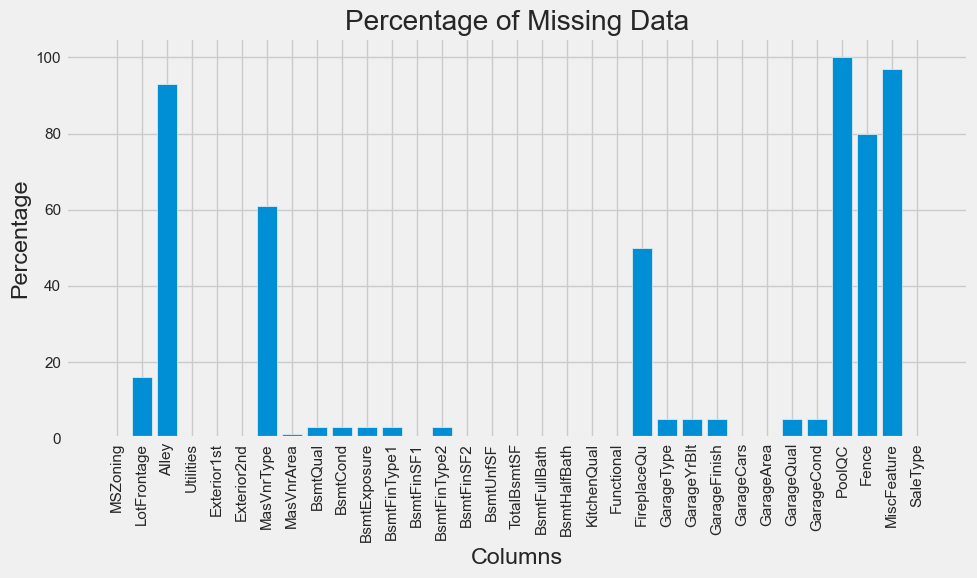

In [14]:
 # calculate missing values
missing_data = {col: [merged_df[col].isnull().sum(), f'% {np.round(np.mean(merged_df[col].isnull()*100))}']
                for col in merged_df.columns if merged_df[col].isnull().any()}
print(missing_data)

# Extracting column names and corresponding missing percentages
columns = list(missing_data.keys())
percentages = [float(value[1].strip('% ')) for value in missing_data.values()]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(columns, percentages)

# Customizing the plot
plt.title('Percentage of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

# Displaying the plot
plt.tight_layout()
plt.show()

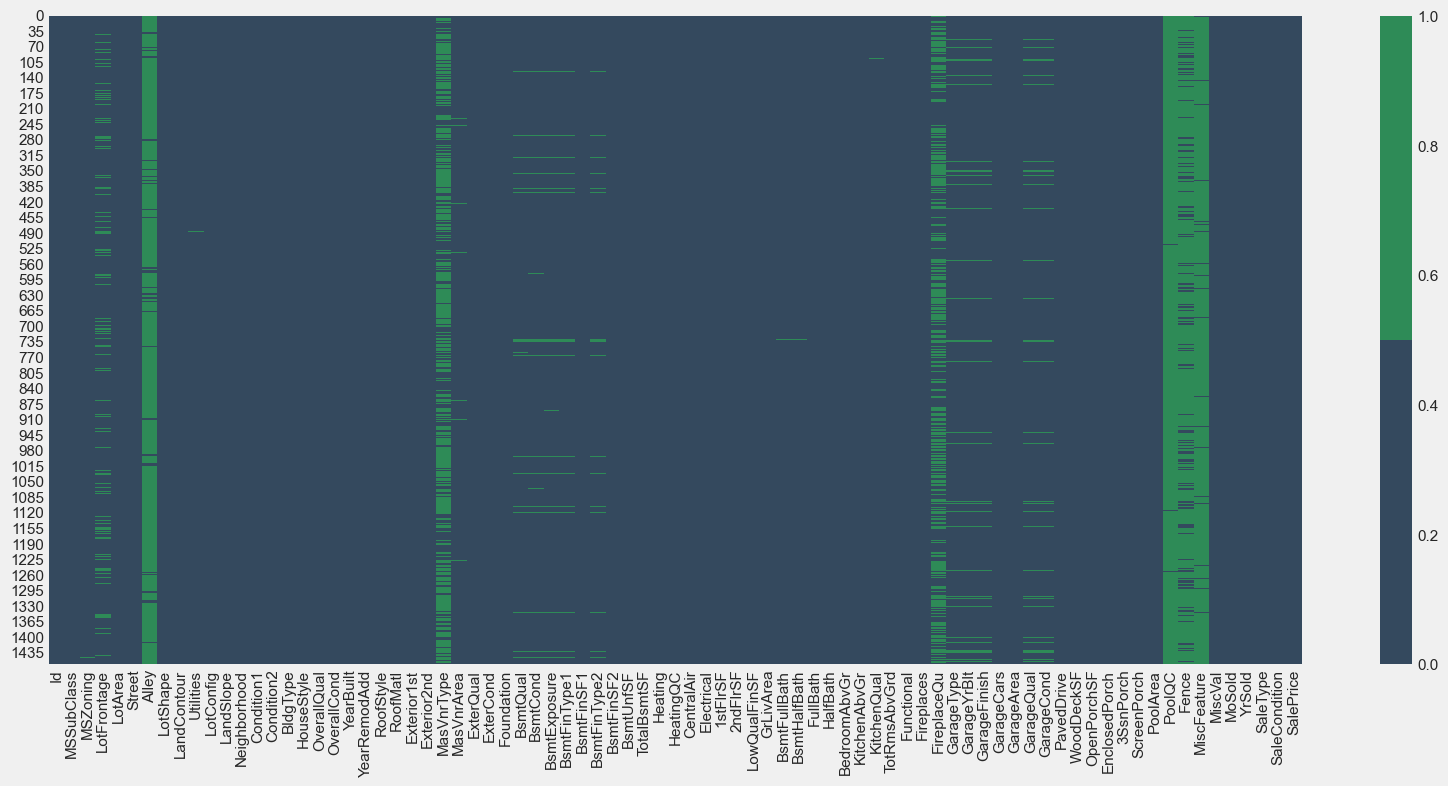

In [15]:
plt.figure(figsize=(18,8))

colours = ['#34495E','seagreen']
sns.heatmap(merged_df.isnull(),cmap=sns.color_palette(colours))
plt.savefig('missingValues_HeatMap_plot.png')

In [16]:
columns_above_30 = {
    column: value[1] for column, value in missing_data.items()
    if float(value[1].replace('%', '')) >= 30.0
}
print("columns_above_30 :",columns_above_30)

columns_above_30 : {'Alley': '% 93.0', 'MasVnrType': '% 61.0', 'FireplaceQu': '% 50.0', 'PoolQC': '% 100.0', 'Fence': '% 80.0', 'MiscFeature': '% 97.0'}


In [17]:
# train_data[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
#        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
#        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
#        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
#        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
#        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
#        'SaleType', 'SaleCondition']]= train_data[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
#        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
#        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
#        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
#        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
#        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
#        'SaleType', 'SaleCondition']].astype('category')

# Dropping columns
Dropping columns with missing values of 30% and Id column

In [18]:
merged_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [19]:
#Recheck the missing values
merged_df.isnull().values.sum()

7878

In [20]:
merged_df=merged_df.drop(columns=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'])


In [21]:
merged_df.isnull().values.sum()

869

{'MSZoning': [4, '% 0.0'], 'LotFrontage': [227, '% 16.0'], 'Utilities': [2, '% 0.0'], 'Exterior1st': [1, '% 0.0'], 'Exterior2nd': [1, '% 0.0'], 'MasVnrArea': [15, '% 1.0'], 'BsmtQual': [44, '% 3.0'], 'BsmtCond': [45, '% 3.0'], 'BsmtExposure': [44, '% 3.0'], 'BsmtFinType1': [42, '% 3.0'], 'BsmtFinSF1': [1, '% 0.0'], 'BsmtFinType2': [42, '% 3.0'], 'BsmtFinSF2': [1, '% 0.0'], 'BsmtUnfSF': [1, '% 0.0'], 'TotalBsmtSF': [1, '% 0.0'], 'BsmtFullBath': [2, '% 0.0'], 'BsmtHalfBath': [2, '% 0.0'], 'KitchenQual': [1, '% 0.0'], 'Functional': [2, '% 0.0'], 'GarageType': [76, '% 5.0'], 'GarageYrBlt': [78, '% 5.0'], 'GarageFinish': [78, '% 5.0'], 'GarageCars': [1, '% 0.0'], 'GarageArea': [1, '% 0.0'], 'GarageQual': [78, '% 5.0'], 'GarageCond': [78, '% 5.0'], 'SaleType': [1, '% 0.0']}


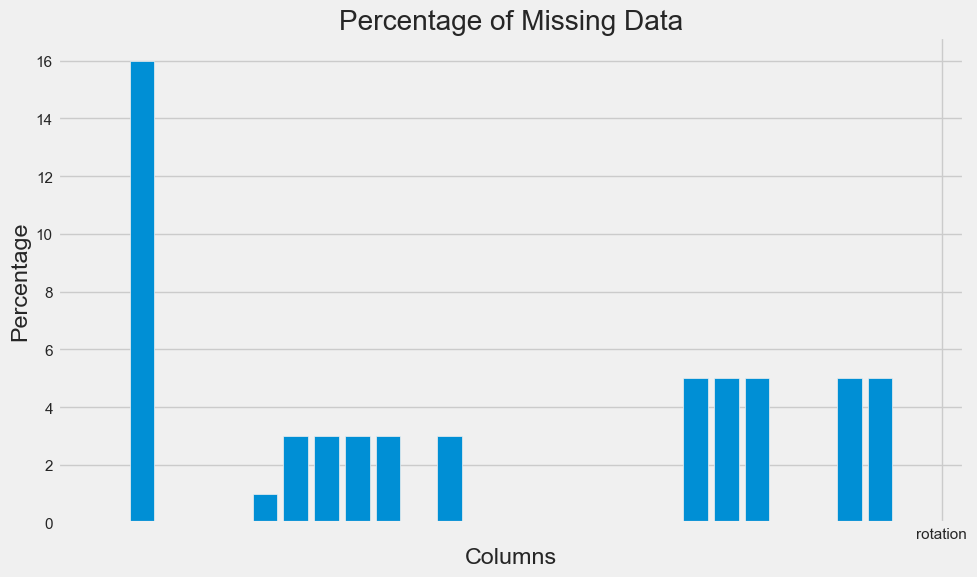

In [22]:
 # calculate missing values
missing_data2 = {col: [merged_df[col].isnull().sum(), f'% {np.round(np.mean(merged_df[col].isnull()*100))}']
                for col in merged_df.columns if merged_df[col].isnull().any()}
print(missing_data2)

# Extracting column names and corresponding missing percentages
columns = list(missing_data2.keys())
percentages = [float(value[1].strip('% ')) for value in missing_data2.values()]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(columns, percentages)

# Customizing the plot
plt.title('Percentage of Missing Data')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks('rotation')

# Displaying the plot
plt.tight_layout()
plt.show()

In [23]:
for i in missing_data2:
    print(i)
# 'LotFrontage','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
# 'BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'

MSZoning
LotFrontage
Utilities
Exterior1st
Exterior2nd
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
SaleType


In [24]:
#{'MSZoning': [4, '% 0.0'], 'GarageCars': [1, '% 0.0'], 'GarageArea': [1, '% 0.0']}

In [25]:

merged_df["GarageCars"].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5., nan])

In [26]:
merged_df[['Exterior2nd','Exterior1st','Utilities']]= merged_df[['Exterior2nd','Exterior1st','Utilities']].astype('category')

In [27]:
merged_df["Exterior2nd"].value_counts()

#creating a new category 'H' as number of missing values is very big
merged_df["Exterior2nd"] = merged_df["Exterior2nd"].cat.add_categories(['Other'])

merged_df["Exterior2nd"] = merged_df["Exterior2nd"].fillna('Other')

In [28]:
merged_df["Exterior1st"].value_counts()

#creating a new category 'H' as number of missing values is very big
merged_df["Exterior1st"] = merged_df["Exterior1st"].cat.add_categories(['ImStucc'])

merged_df["Exterior1st"] = merged_df["Exterior1st"].fillna('ImStucc')

In [29]:
merged_df["Utilities"].value_counts()

#creating a new category 'H' as number of missing values is very big
merged_df["Utilities"] = merged_df["Utilities"].cat.add_categories(['NoSeWa'])

merged_df["Utilities"] = merged_df["Utilities"].fillna('NoSeWa')


## Mean Imputation
'LotFrontage','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'

In [30]:
merged_df[["GarageArea","LotFrontage","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF",
           "TotalBsmtSF"]] = merged_df[["GarageArea","LotFrontage","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF",
           "TotalBsmtSF"]].fillna(merged_df[["GarageArea","LotFrontage","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF",
           "TotalBsmtSF"]].mean())


### Mode Imputattion

In [31]:
# Mode Imputattion
# List of categorical columns where you want to impute missing values
categorical_columns = ['MSZoning','Functional','KitchenQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond','SaleType']

# Impute missing values in each column with its respective mode
for column in categorical_columns:
    merged_df[column].fillna(merged_df[column].mode()[0], inplace=True)


In [32]:
merged_df['GarageCars']

0       1.0
1       1.0
2       2.0
3       2.0
4       2.0
       ... 
1454    0.0
1455    1.0
1456    2.0
1457    0.0
1458    3.0
Name: GarageCars, Length: 1459, dtype: float64

In [33]:
merged_df["GarageYrBlt"].unique()

array([1961., 1958., 1997., 1998., 1992., 1993., 1990., 1970., 1999.,
       1971., 1975., 2009., 2005., 2003., 2002., 2006., 2004., 1920.,
       1974., 2000., 2010., 1967., 1978., 1966., 1964.,   nan, 1994.,
       1949., 1959., 1956., 1952., 1955., 1989., 1950., 1960., 1963.,
       1900., 1957., 1938., 1948., 1962., 1928., 1930., 1926., 1939.,
       1973., 1942., 1979., 1923., 1915., 1917., 1940., 1910., 1969.,
       1968., 1977., 1945., 1987., 1947., 1954., 1941., 1951., 1896.,
       1976., 2008., 2007., 1965., 2001., 1972., 1984., 1985., 1996.,
       1995., 1980., 1986., 1981., 1982., 1991., 1988., 1953., 1924.,
       1927., 1946., 1934., 1983., 1916., 1918., 1937., 1932., 1935.,
       1925., 1921., 1895., 1922., 2207., 1936., 1943., 1919.])

In [34]:
# Missing data imputation using the mode
merged_df["BsmtHalfBath"].fillna(merged_df["BsmtHalfBath"].mode()[0], inplace=True)

In [35]:
# Missing data imputation using the mode
merged_df["BsmtFullBath"].fillna(merged_df["BsmtFullBath"].mode()[0], inplace=True)

In [36]:
# Missing data imputation using the mode
merged_df["GarageYrBlt"].fillna(merged_df["GarageYrBlt"].mode()[0], inplace=True)


In [37]:

# Replace NaN and 5 with 4
merged_df["GarageCars"].replace({np.nan: 4, 5: 4}, inplace=True)

# Check the unique values after replacement
print(merged_df["GarageCars"].unique())


[1. 2. 3. 0. 4.]


In [38]:
#Recheck the missing values
merged_df.isnull().values.sum()

0

In [39]:
merged_df.shape

(1459, 75)

In [40]:
# Drop Id column as it is not important
merged_df=merged_df.drop(columns = ['Id'])

In [41]:
merged_df.shape

(1459, 74)

# Handling Outliers

In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1459 non-null   int64   
 1   MSZoning       1459 non-null   object  
 2   LotFrontage    1459 non-null   float64 
 3   LotArea        1459 non-null   int64   
 4   Street         1459 non-null   object  
 5   LotShape       1459 non-null   object  
 6   LandContour    1459 non-null   object  
 7   Utilities      1459 non-null   category
 8   LotConfig      1459 non-null   object  
 9   LandSlope      1459 non-null   object  
 10  Neighborhood   1459 non-null   object  
 11  Condition1     1459 non-null   object  
 12  Condition2     1459 non-null   object  
 13  BldgType       1459 non-null   object  
 14  HouseStyle     1459 non-null   object  
 15  OverallQual    1459 non-null   int64   
 16  OverallCond    1459 non-null   int64   
 17  YearBuilt      1459 non-null   in

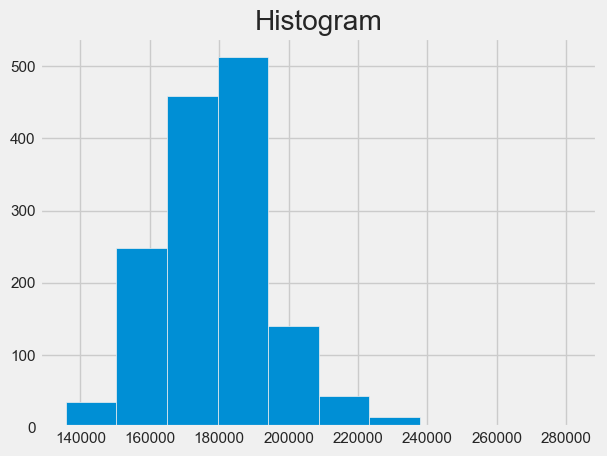

In [43]:
plt.hist(merged_df['SalePrice'])
 
plt.title("Histogram")
 
# Adding the legends
plt.show()

In [44]:
merged_df['SalePrice']

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1459, dtype: float64

In [45]:
merged_df.shape

(1459, 74)

In [46]:
#Checking the total number of categorical and numerical columns
cat_cols2=merged_df.select_dtypes(include=['object']).columns
num_cols2 = merged_df.select_dtypes(include=np.number).columns.tolist()
#categorical
print("Categorical Variables:")
print(cat_cols2)
print("sum of cat_variables:",len(cat_cols2))
#numerical
print("Numerical Variables:")
print(num_cols2)
print("sum of numerical_variables:",len(num_cols2))

Categorical Variables:
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
sum of cat_variables: 34
Numerical Variables:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF

MSSubClass
Skew : 1.35


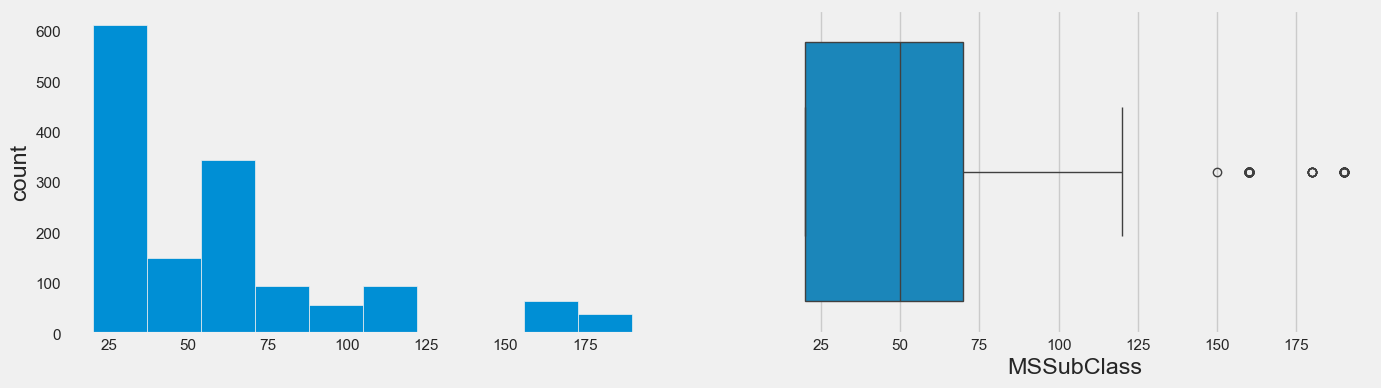

LotFrontage
Skew : 0.72


<Figure size 640x480 with 0 Axes>

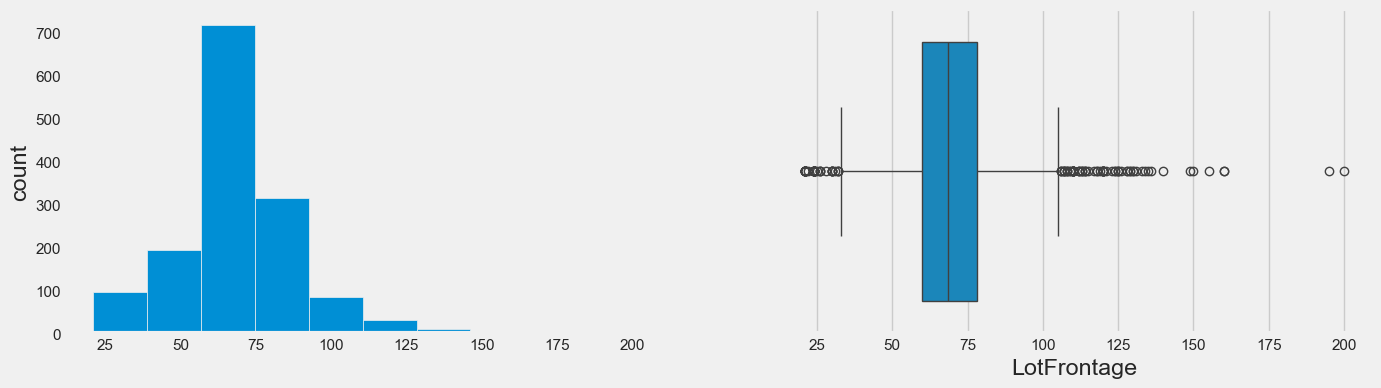

LotArea
Skew : 3.12


<Figure size 640x480 with 0 Axes>

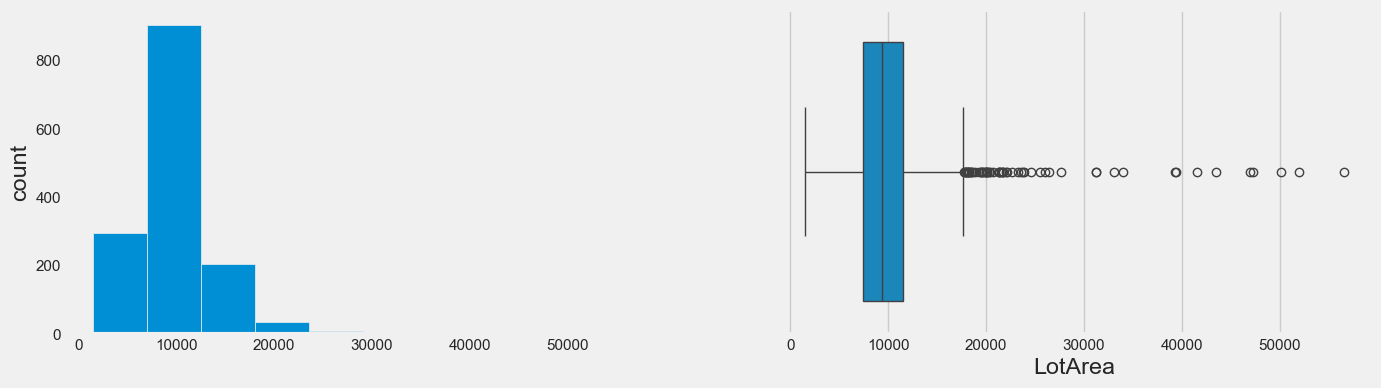

OverallQual
Skew : 0.18


<Figure size 640x480 with 0 Axes>

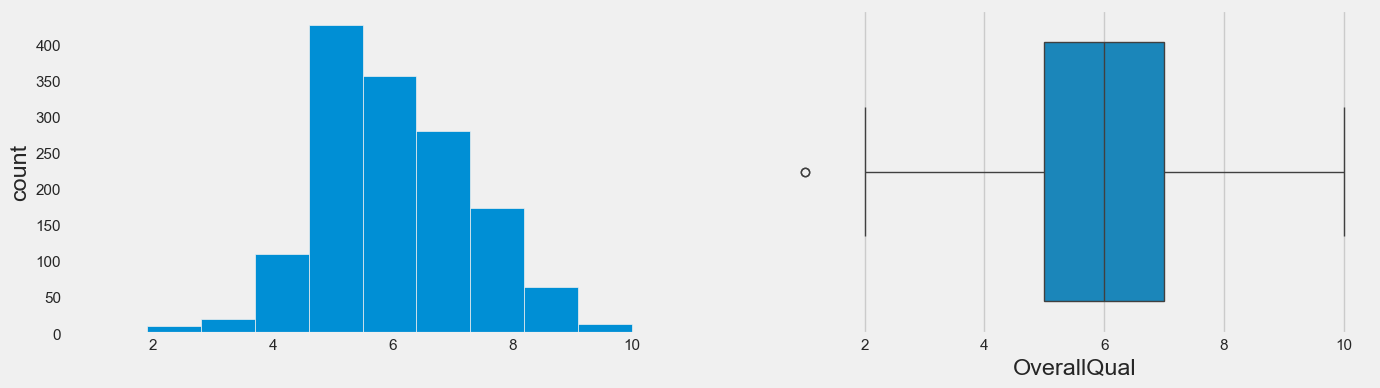

OverallCond
Skew : 0.45


<Figure size 640x480 with 0 Axes>

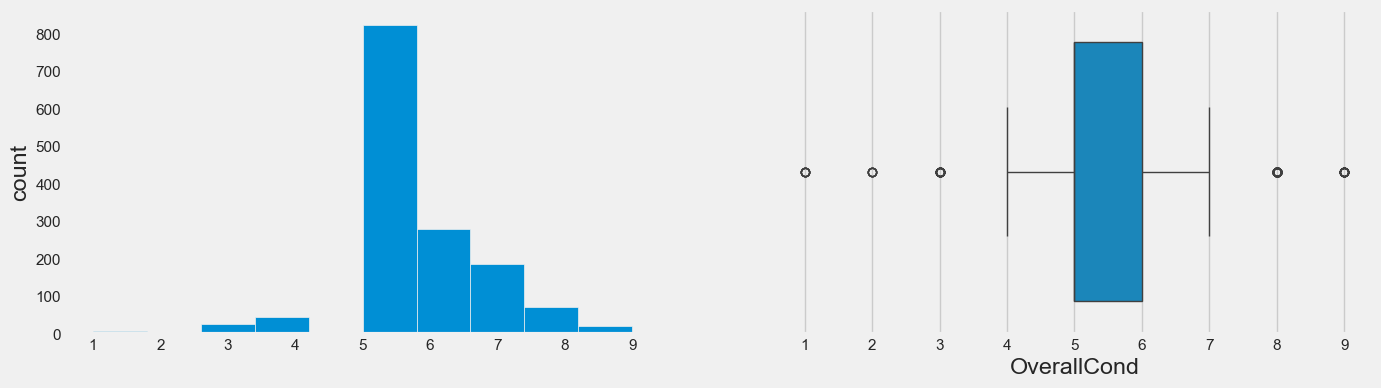

YearBuilt
Skew : -0.59


<Figure size 640x480 with 0 Axes>

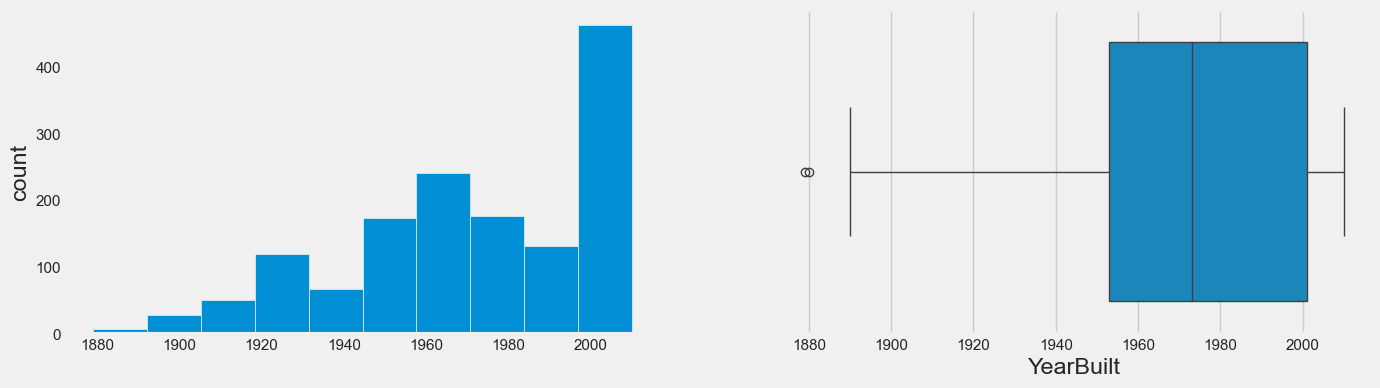

YearRemodAdd
Skew : -0.4


<Figure size 640x480 with 0 Axes>

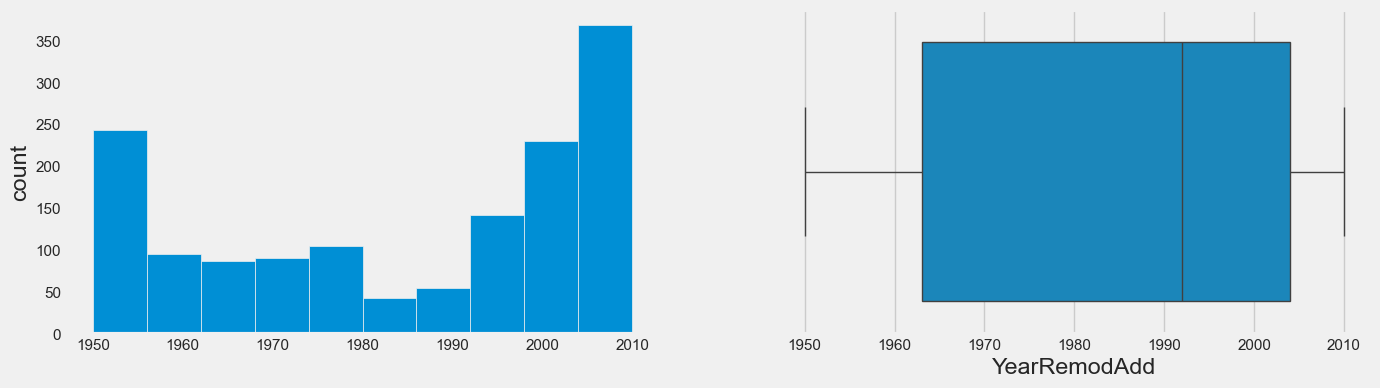

MasVnrArea
Skew : 2.55


<Figure size 640x480 with 0 Axes>

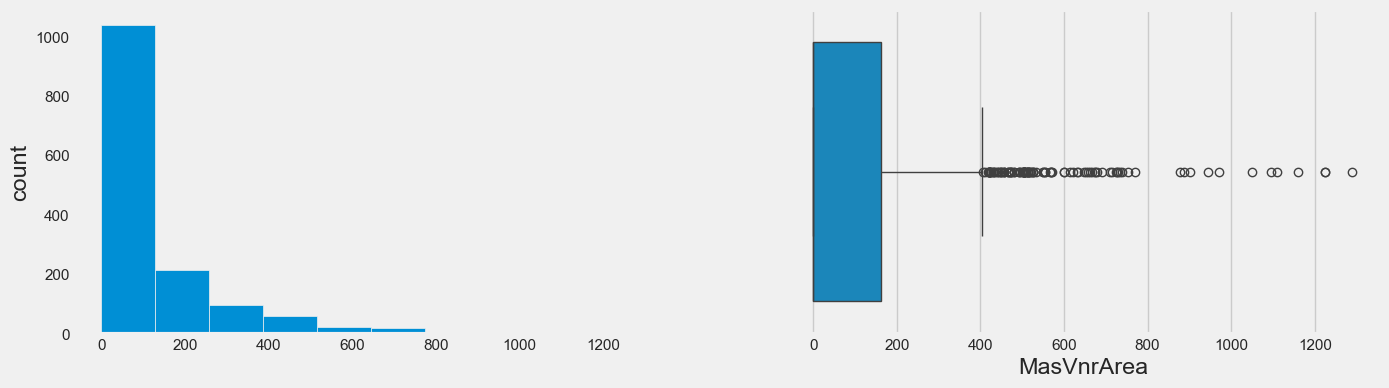

BsmtFinSF1
Skew : 1.17


<Figure size 640x480 with 0 Axes>

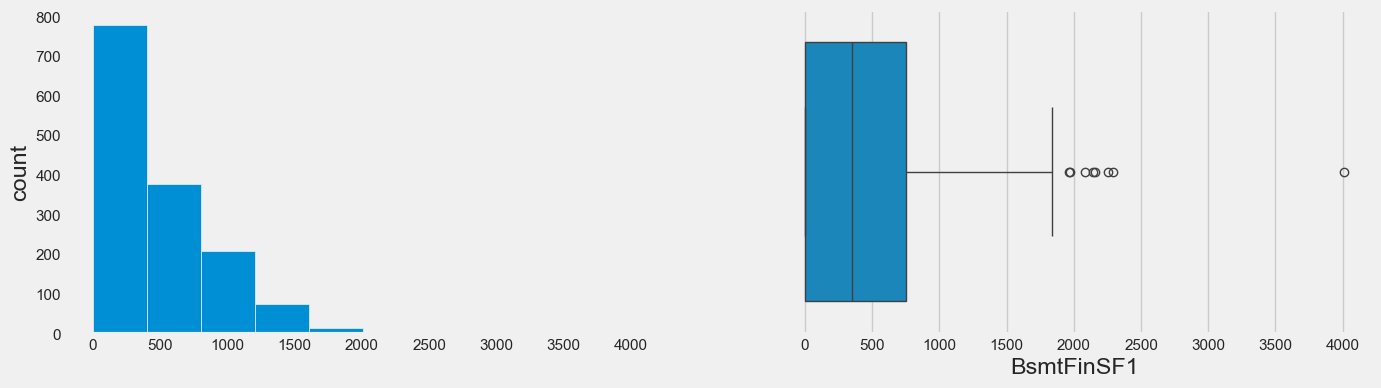

BsmtFinSF2
Skew : 4.04


<Figure size 640x480 with 0 Axes>

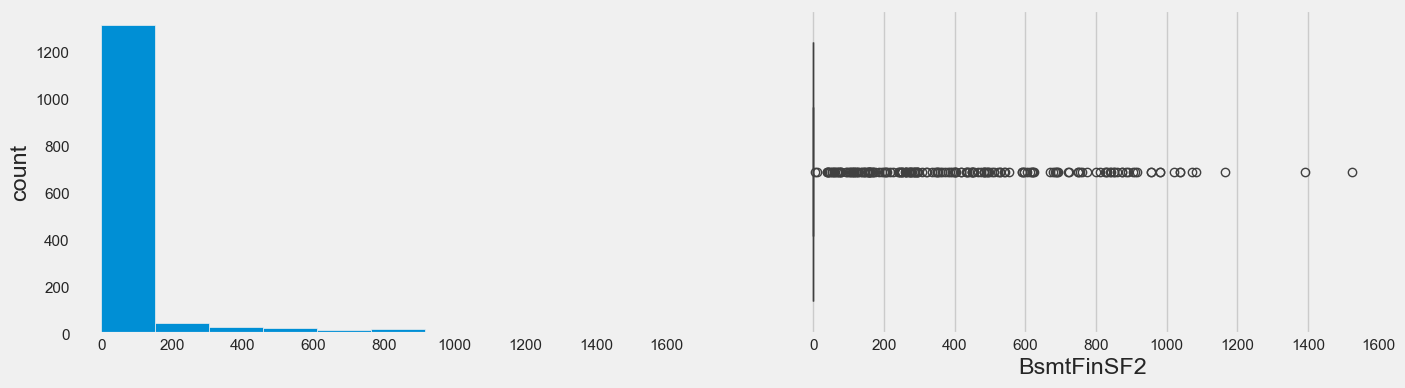

BsmtUnfSF
Skew : 0.92


<Figure size 640x480 with 0 Axes>

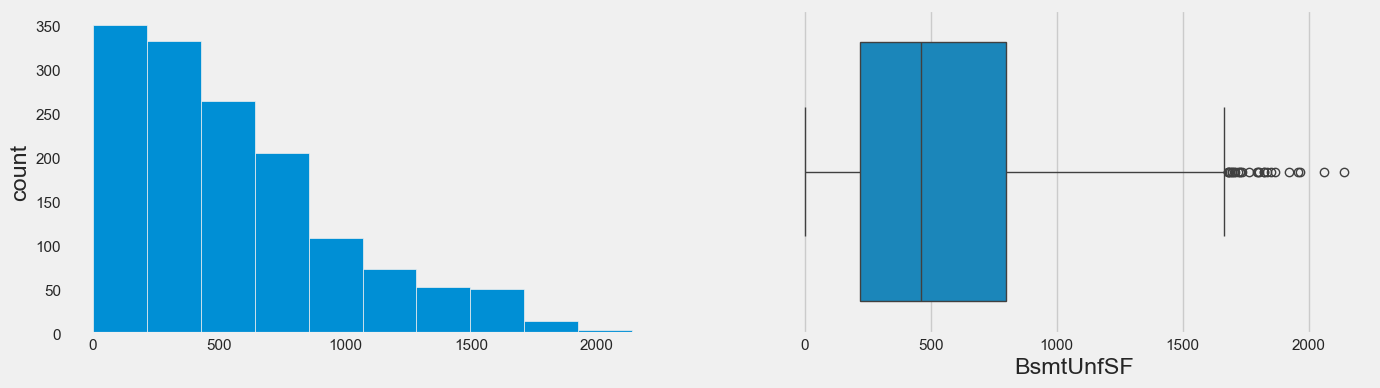

TotalBsmtSF
Skew : 0.81


<Figure size 640x480 with 0 Axes>

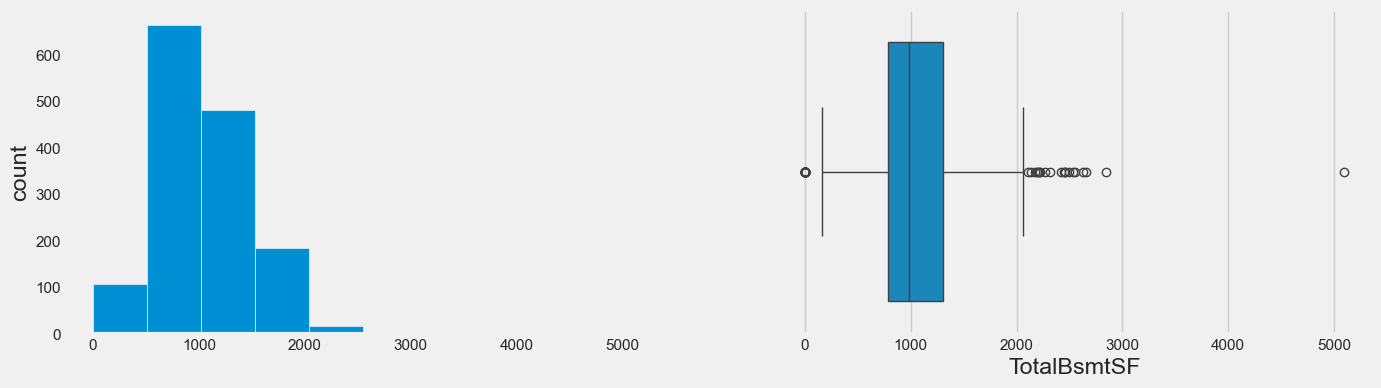

1stFlrSF
Skew : 1.56


<Figure size 640x480 with 0 Axes>

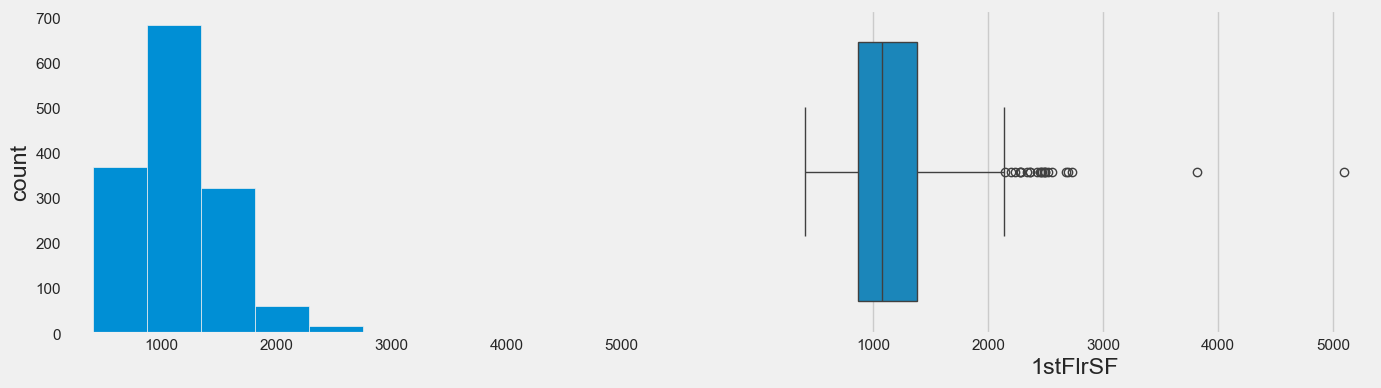

2ndFlrSF
Skew : 0.91


<Figure size 640x480 with 0 Axes>

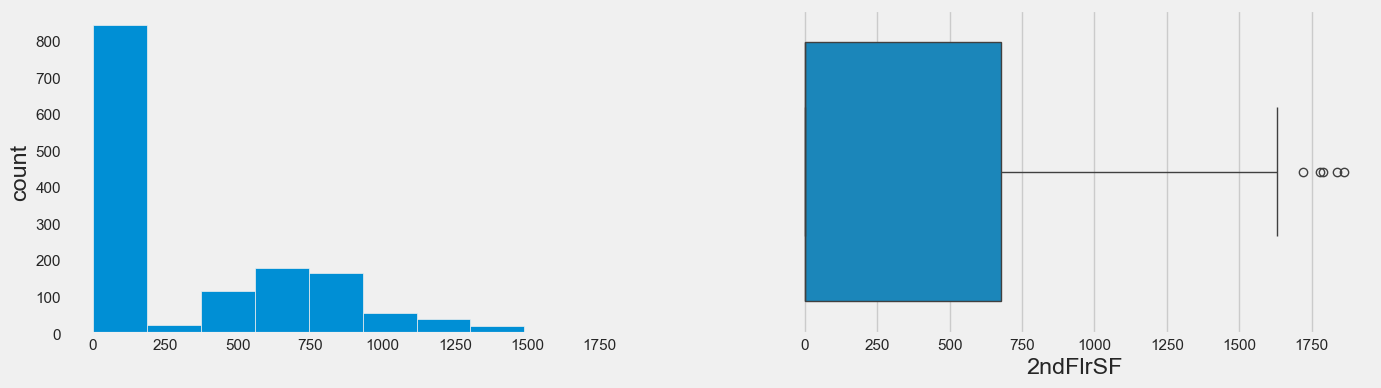

LowQualFinSF
Skew : 16.17


<Figure size 640x480 with 0 Axes>

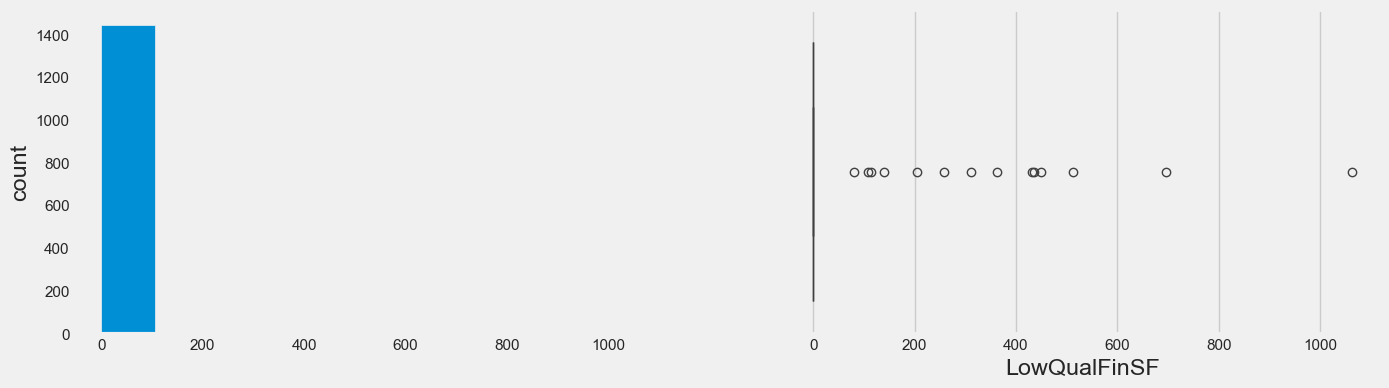

GrLivArea
Skew : 1.13


<Figure size 640x480 with 0 Axes>

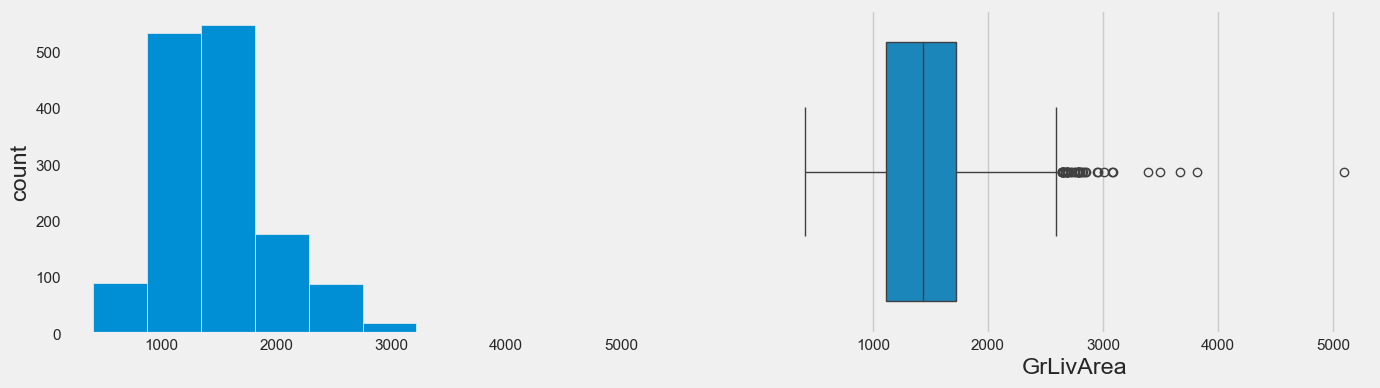

BsmtFullBath
Skew : 0.65


<Figure size 640x480 with 0 Axes>

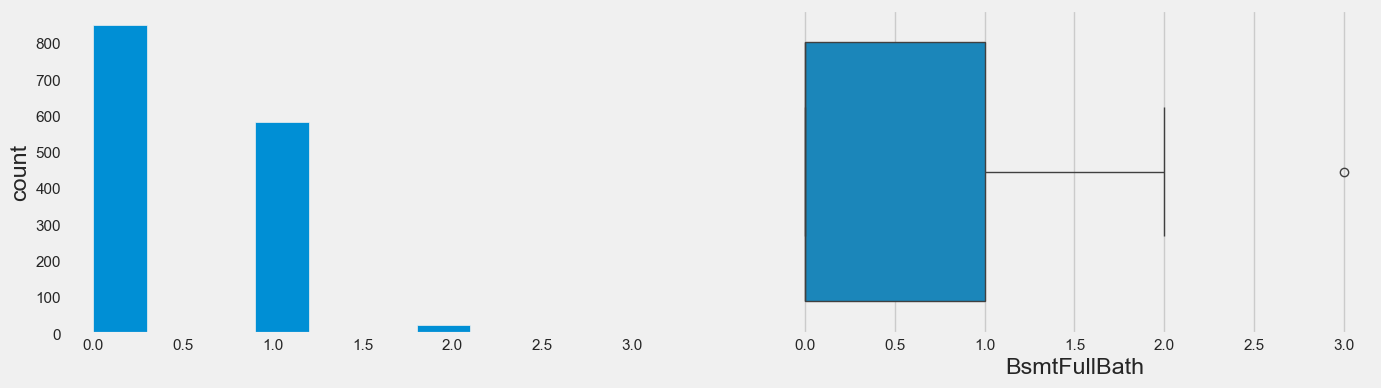

BsmtHalfBath
Skew : 3.78


<Figure size 640x480 with 0 Axes>

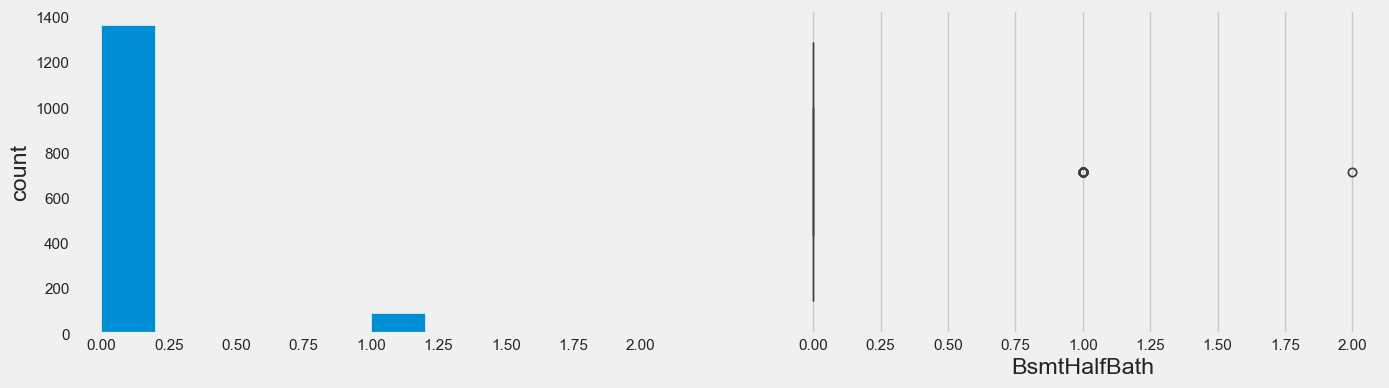

FullBath
Skew : 0.3


<Figure size 640x480 with 0 Axes>

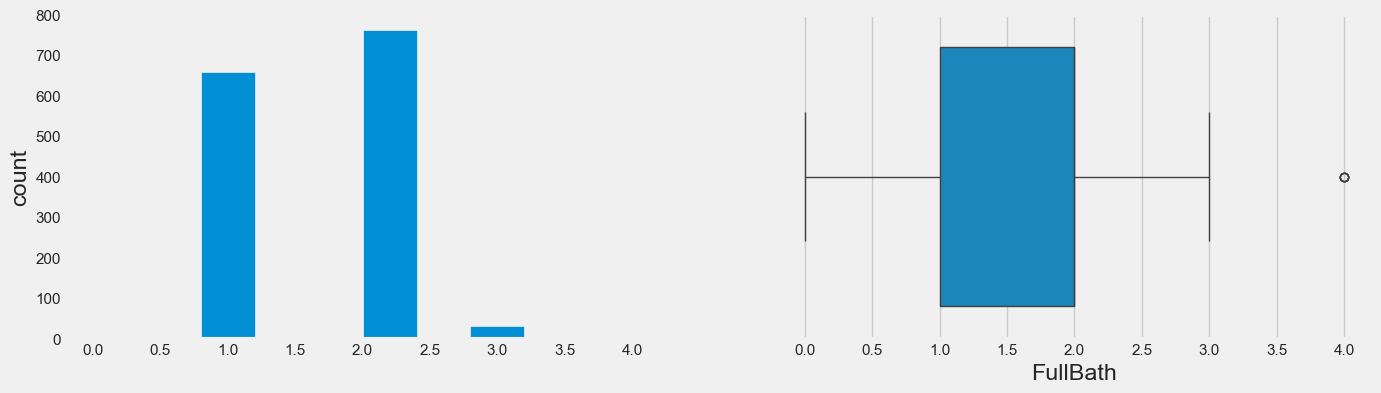

HalfBath
Skew : 0.71


<Figure size 640x480 with 0 Axes>

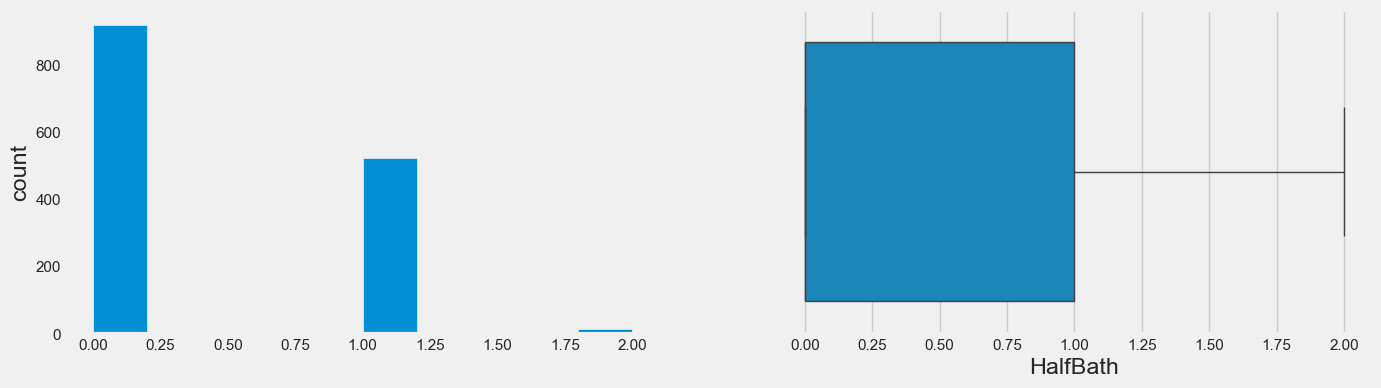

BedroomAbvGr
Skew : 0.44


<Figure size 640x480 with 0 Axes>

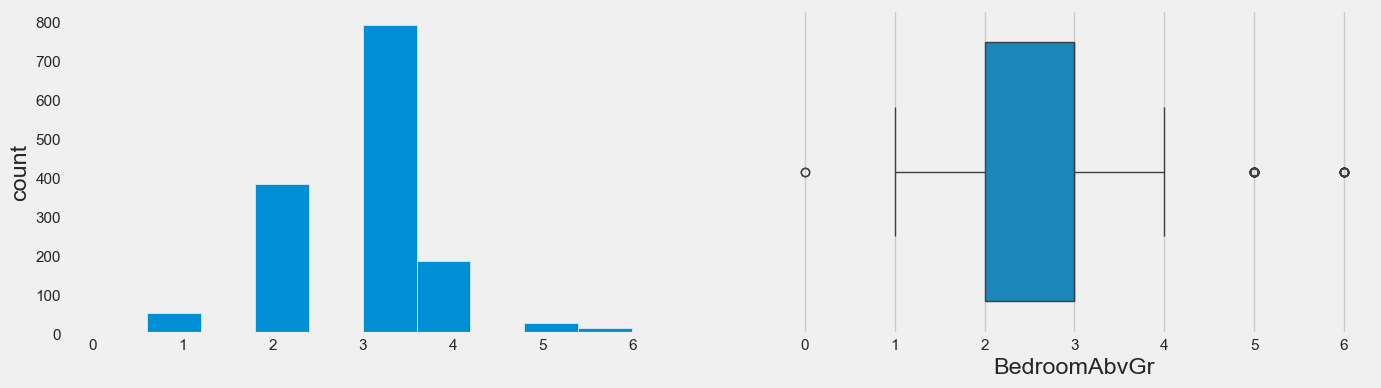

KitchenAbvGr
Skew : 4.08


<Figure size 640x480 with 0 Axes>

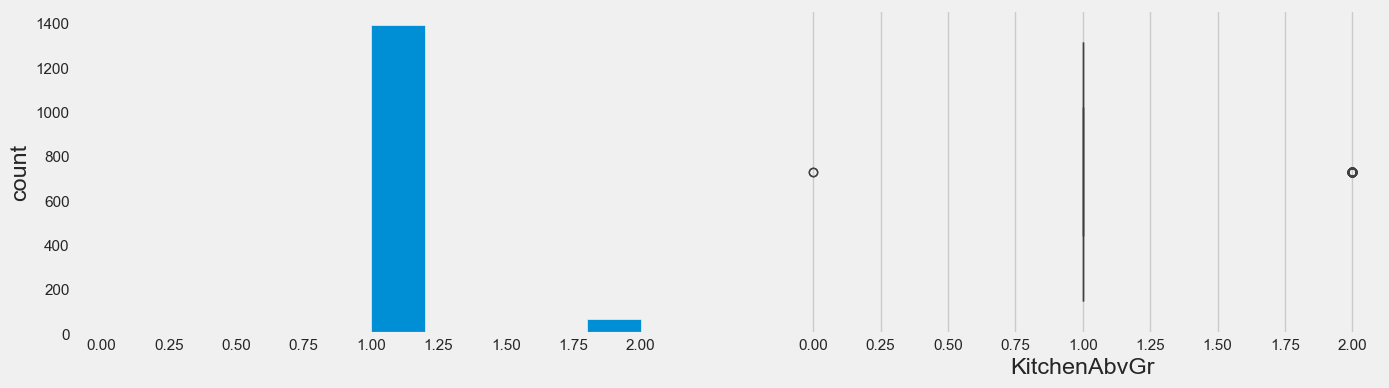

TotRmsAbvGrd
Skew : 0.84


<Figure size 640x480 with 0 Axes>

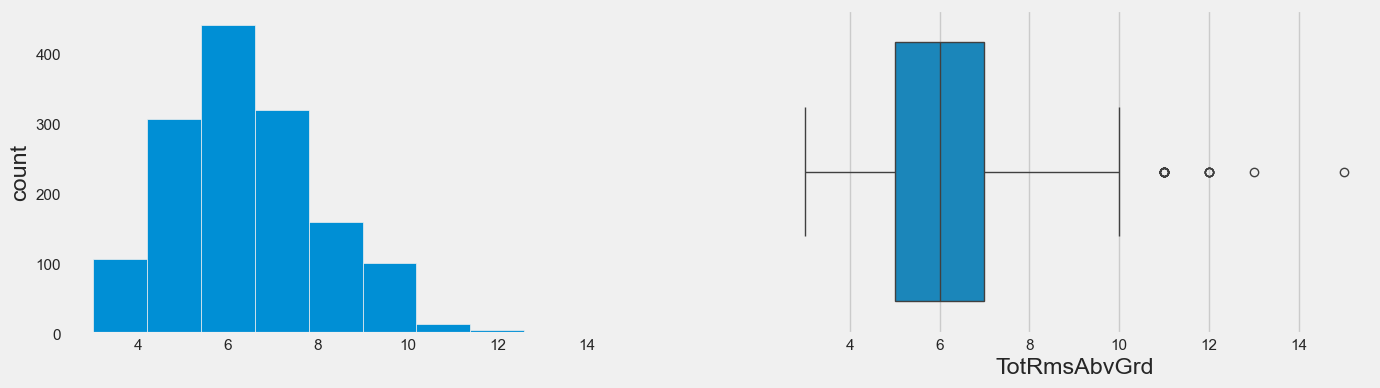

Fireplaces
Skew : 0.82


<Figure size 640x480 with 0 Axes>

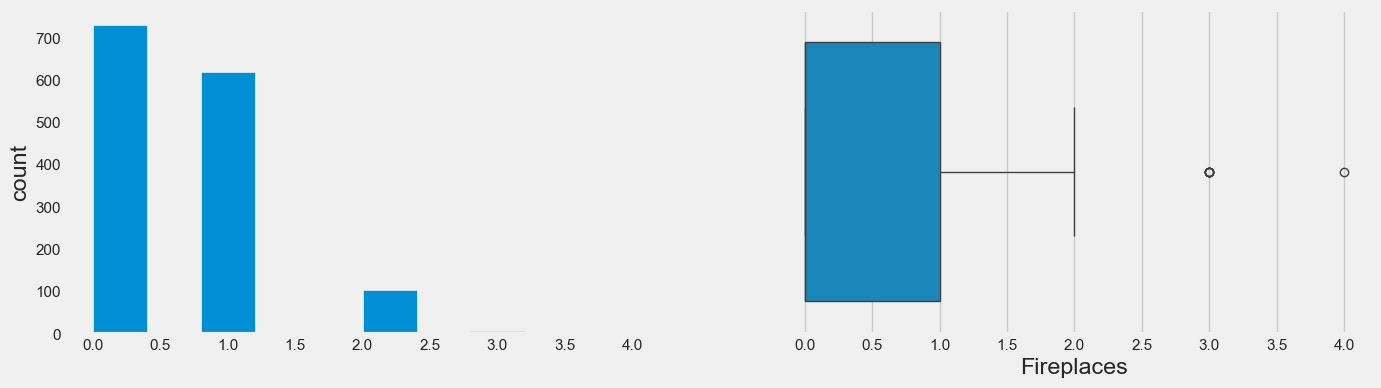

GarageYrBlt
Skew : -0.26


<Figure size 640x480 with 0 Axes>

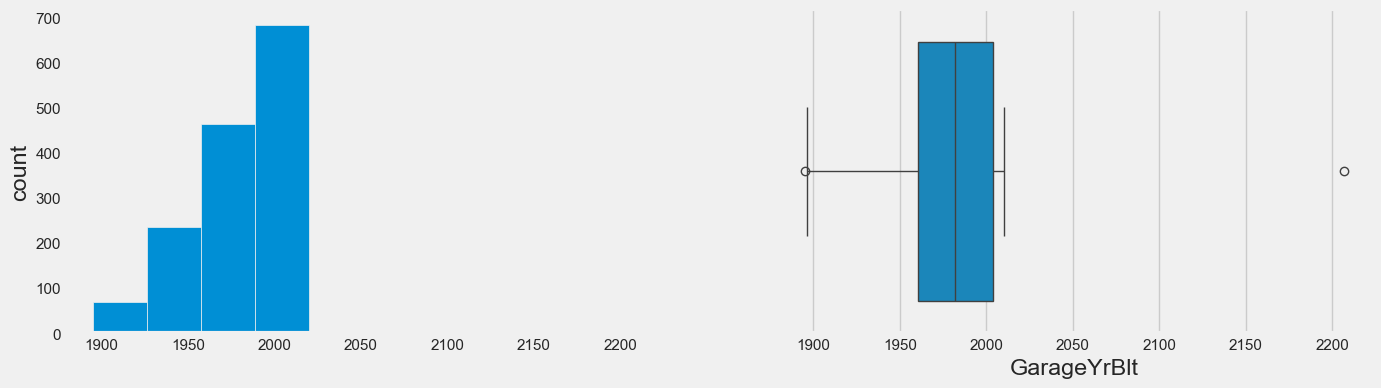

GarageCars
Skew : -0.13


<Figure size 640x480 with 0 Axes>

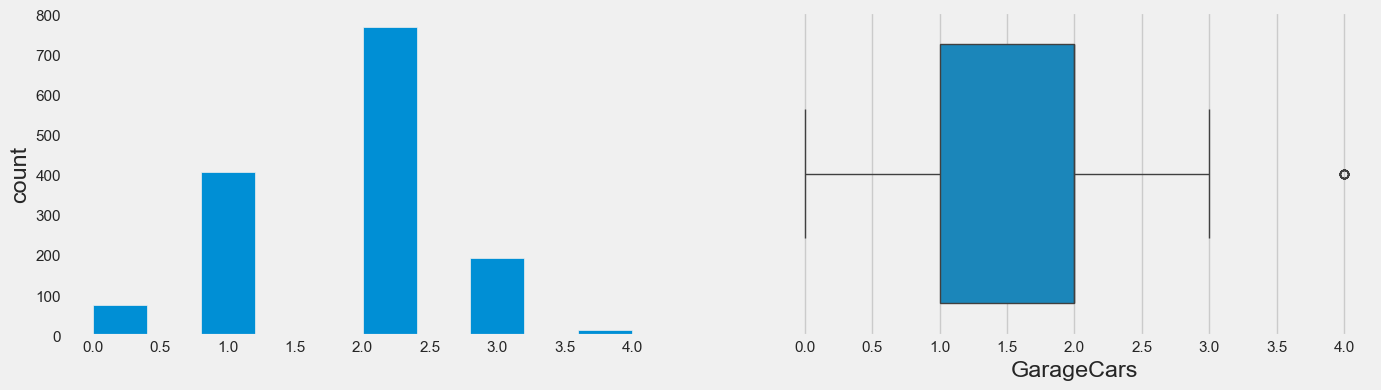

GarageArea
Skew : 0.3


<Figure size 640x480 with 0 Axes>

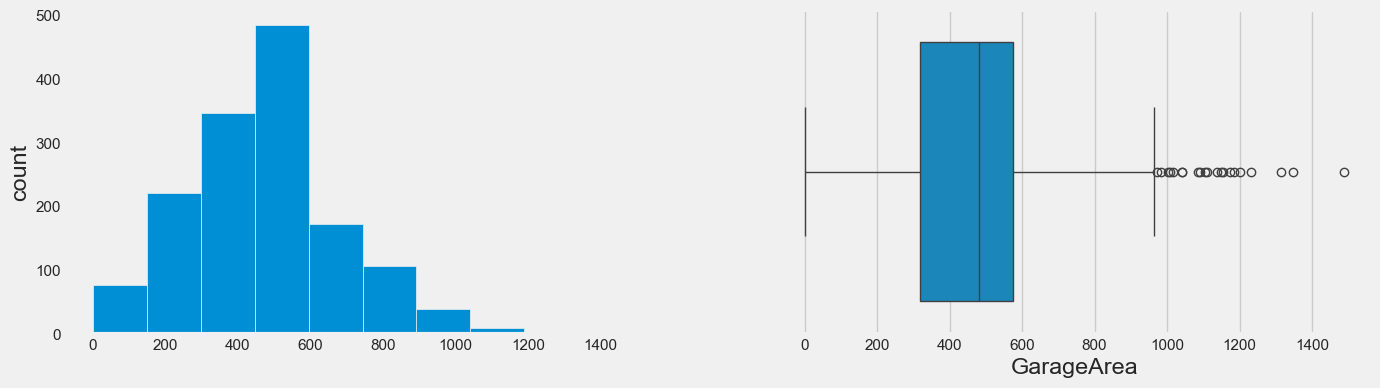

WoodDeckSF
Skew : 2.13


<Figure size 640x480 with 0 Axes>

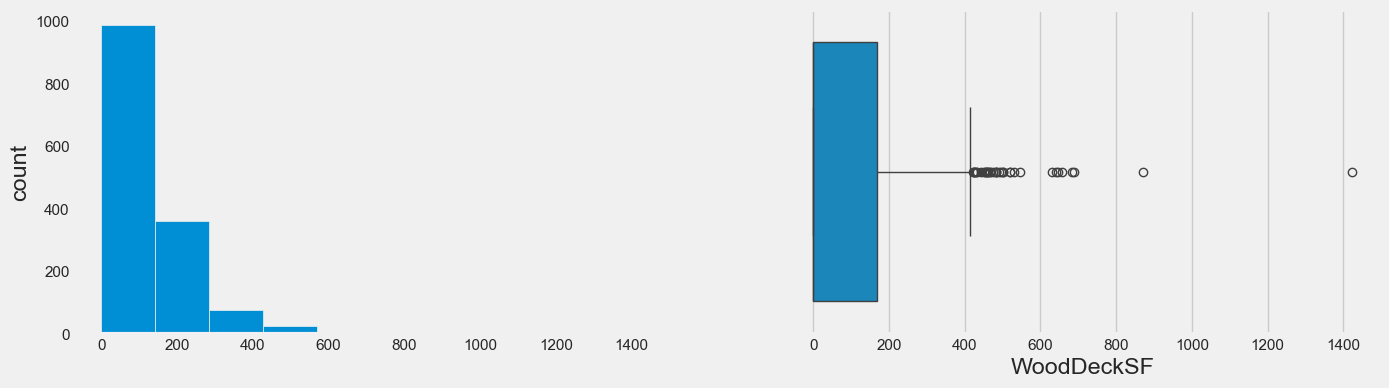

OpenPorchSF
Skew : 2.69


<Figure size 640x480 with 0 Axes>

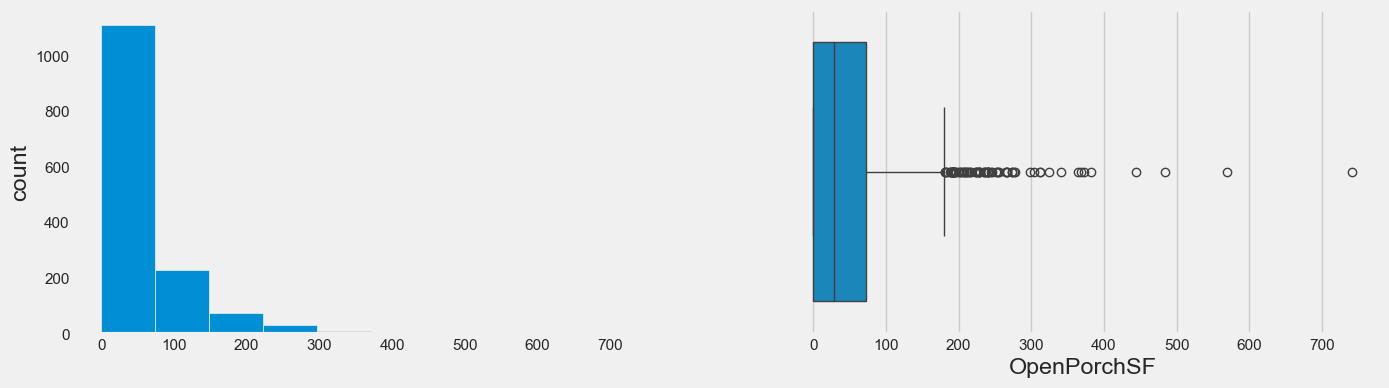

EnclosedPorch
Skew : 4.67


<Figure size 640x480 with 0 Axes>

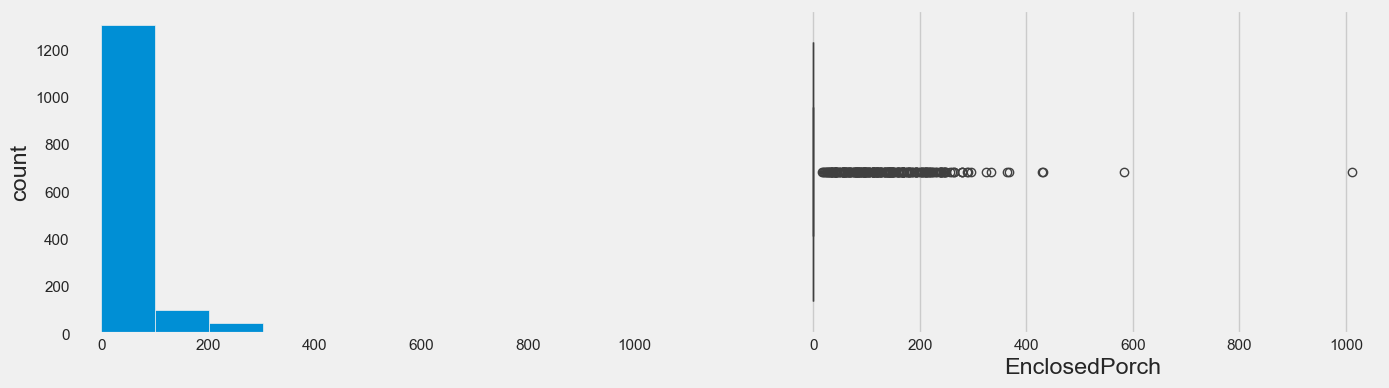

3SsnPorch
Skew : 12.52


<Figure size 640x480 with 0 Axes>

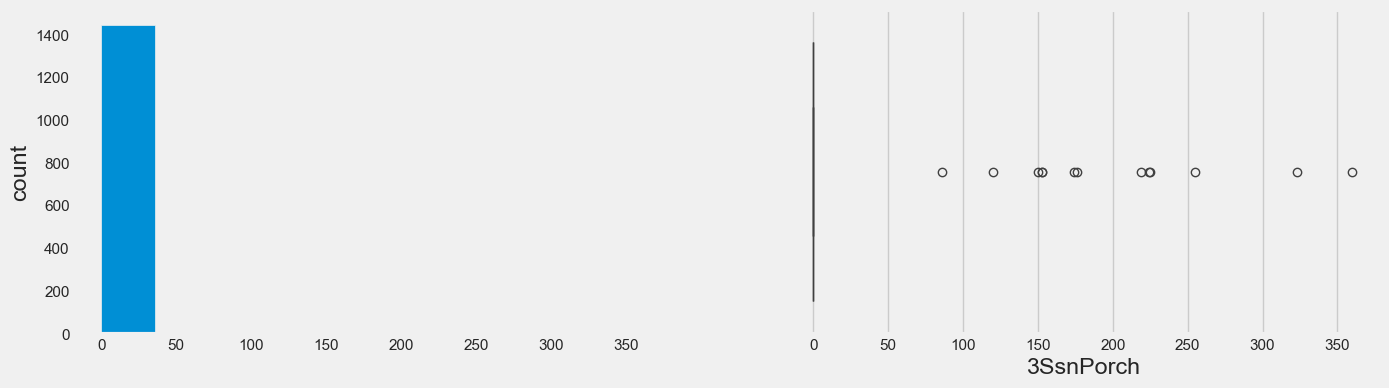

ScreenPorch
Skew : 3.79


<Figure size 640x480 with 0 Axes>

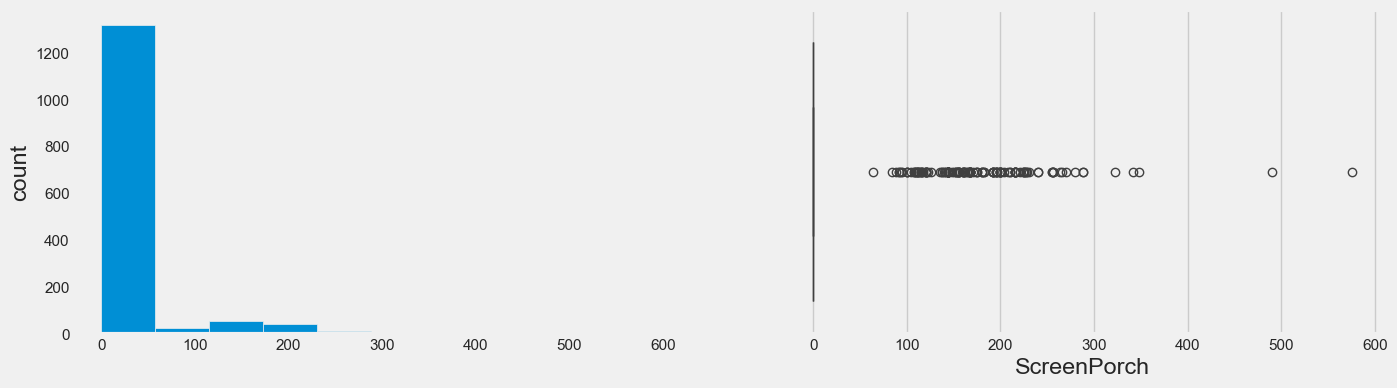

PoolArea
Skew : 20.2


<Figure size 640x480 with 0 Axes>

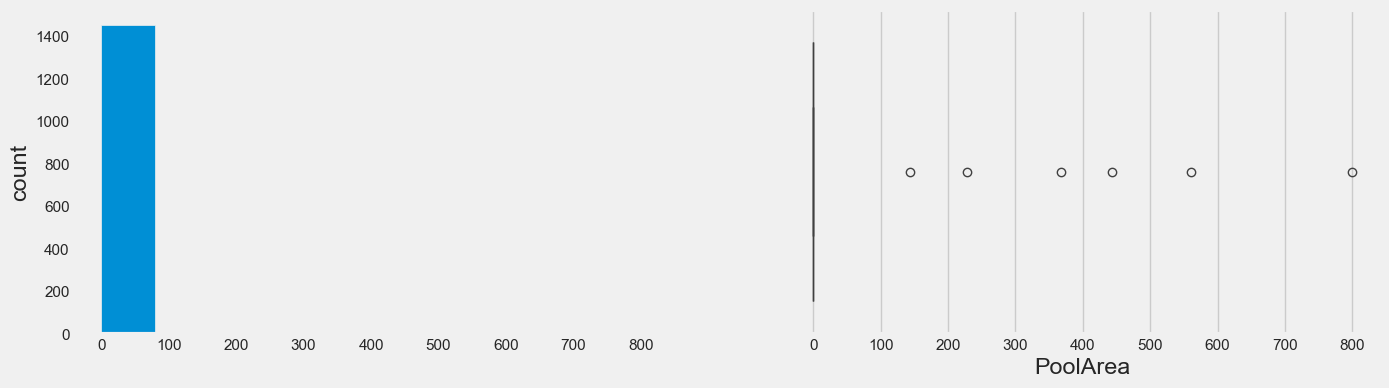

MiscVal
Skew : 20.08


<Figure size 640x480 with 0 Axes>

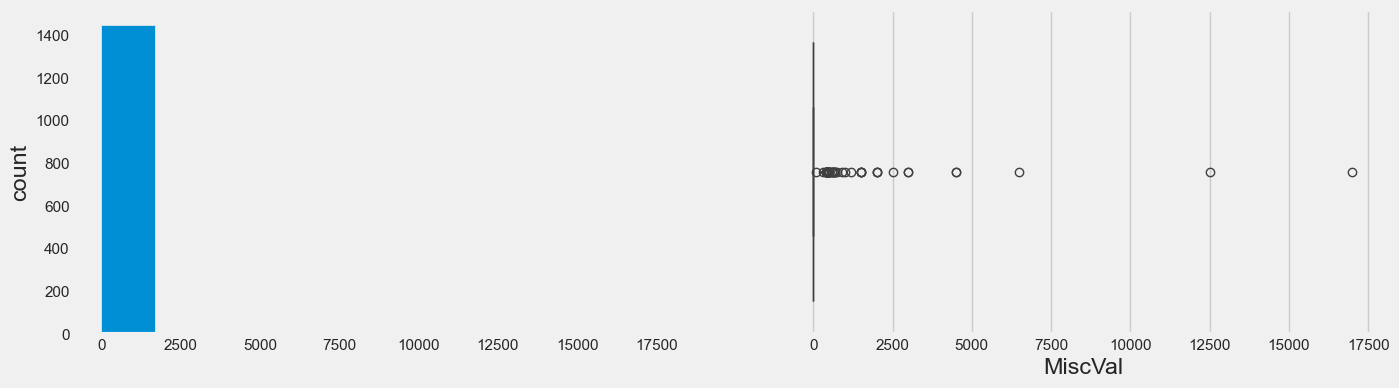

MoSold
Skew : 0.18


<Figure size 640x480 with 0 Axes>

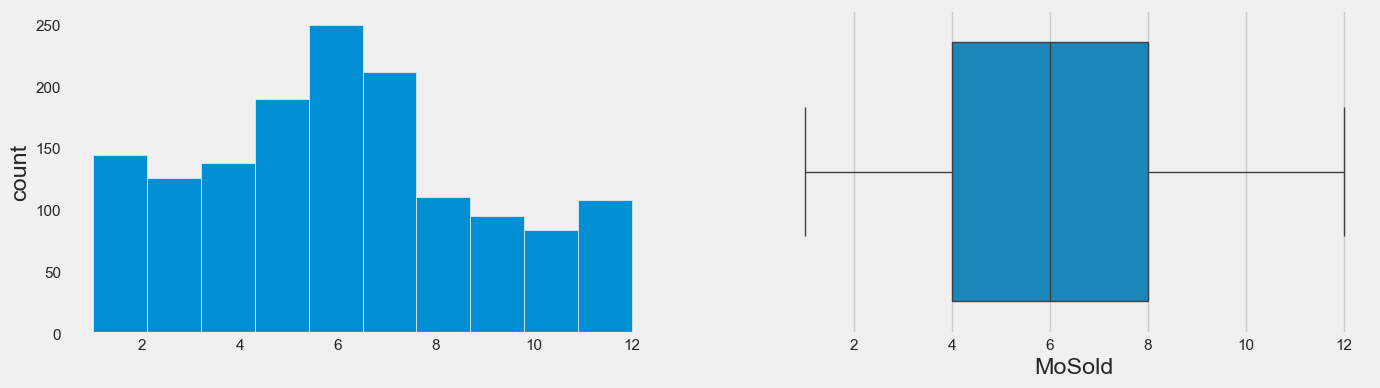

YrSold
Skew : 0.17


<Figure size 640x480 with 0 Axes>

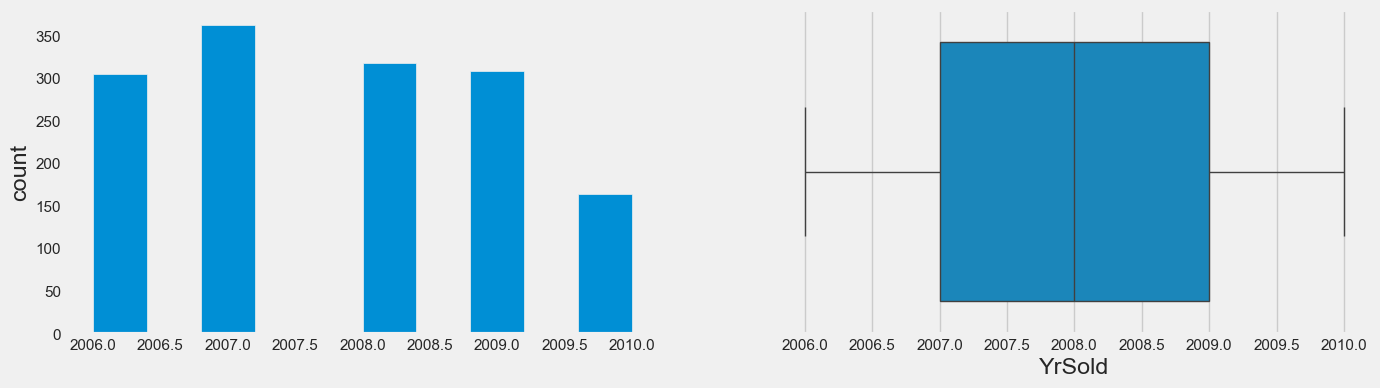

SalePrice
Skew : 0.93


<Figure size 640x480 with 0 Axes>

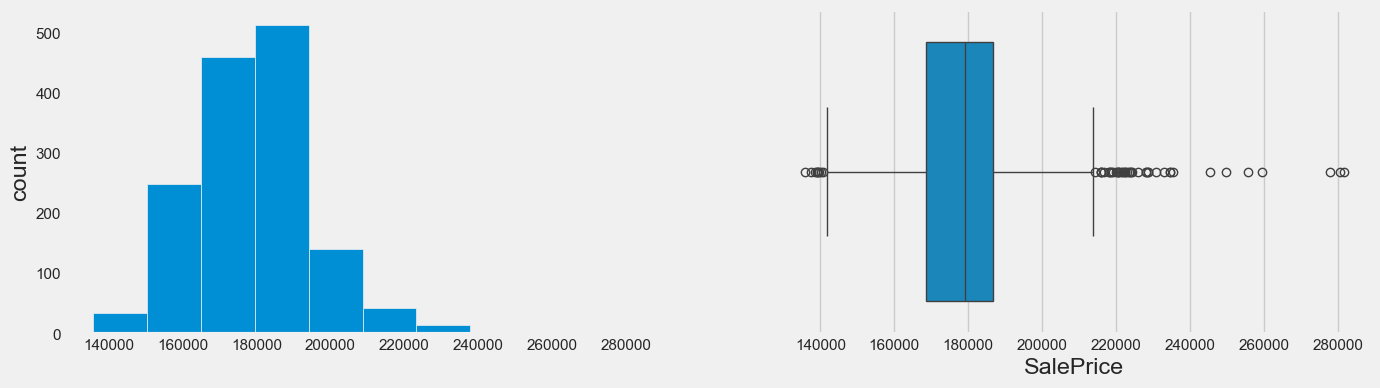

<Figure size 640x480 with 0 Axes>

In [47]:
for col in num_cols2:
    print(col)
    print('Skew :', round(merged_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    merged_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=merged_df[col])
    plt.show()
    plt.savefig('box_plot9.png')

# Handling Outliers


In [48]:
#Install feature-engine
#!pip install feature-engine

In [49]:
from feature_engine.outliers import Winsorizer

MSSubClass


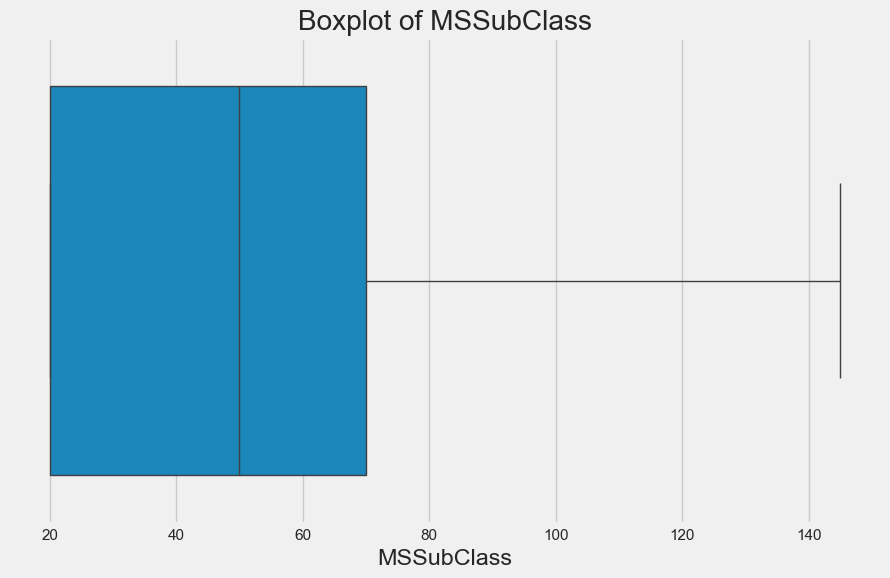

LotFrontage


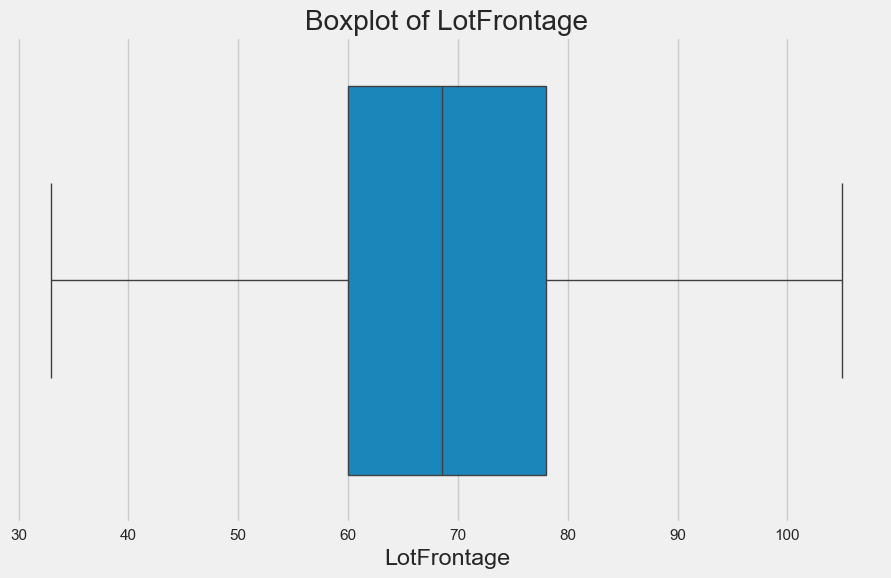

LotArea


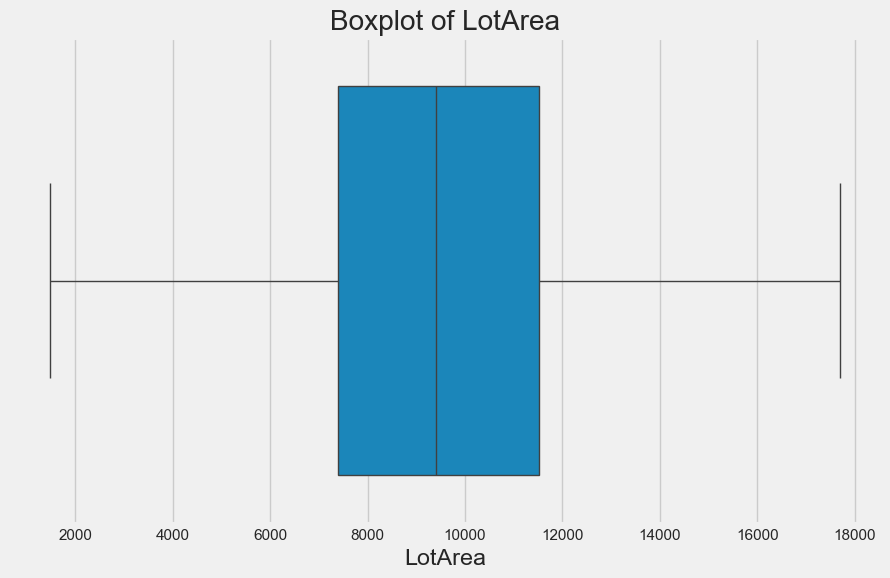

OverallQual


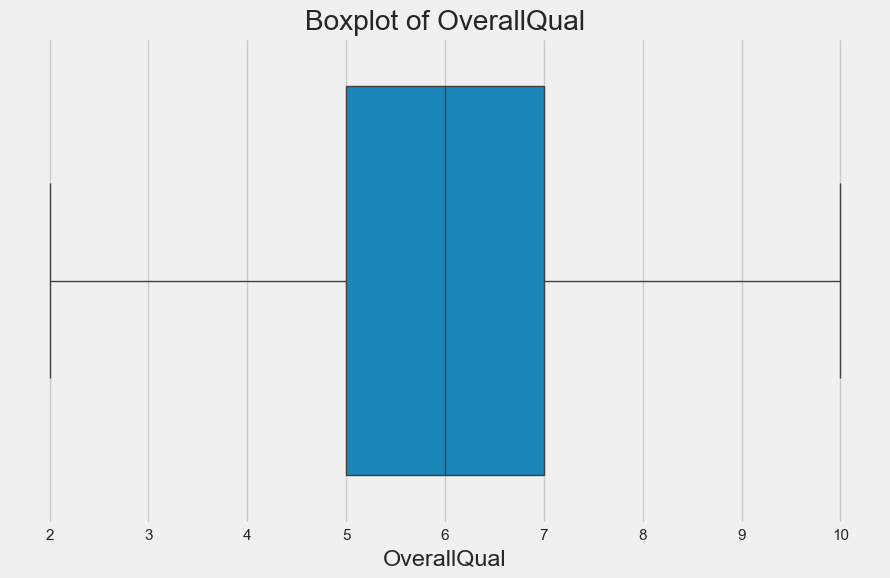

OverallCond


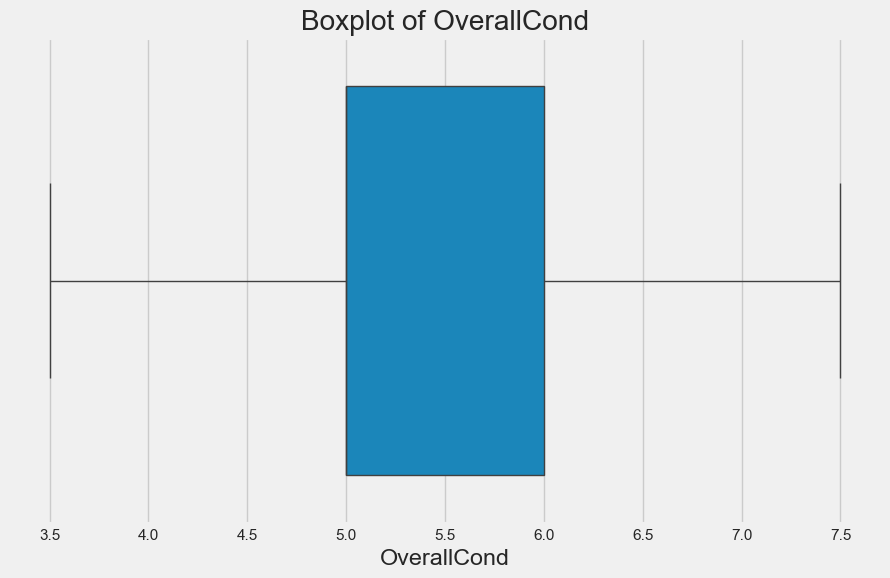

YearBuilt


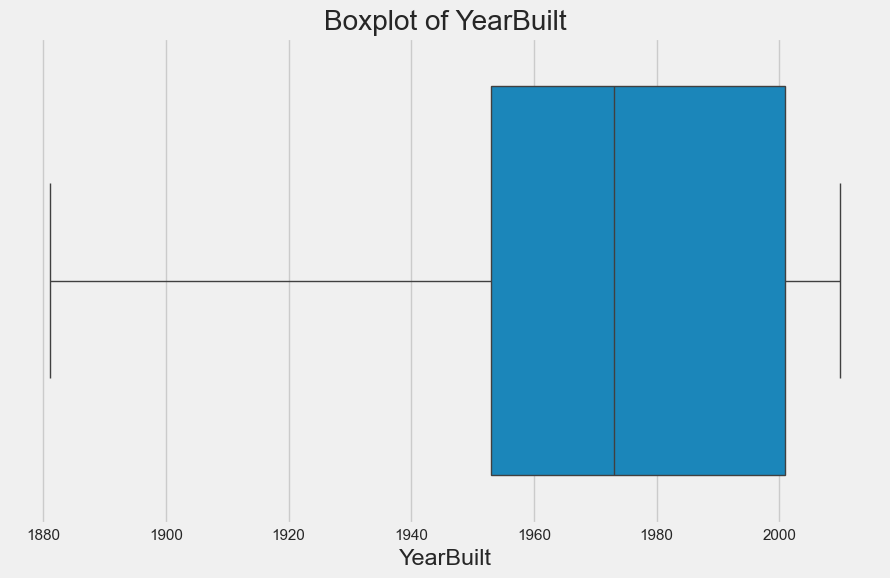

MasVnrArea


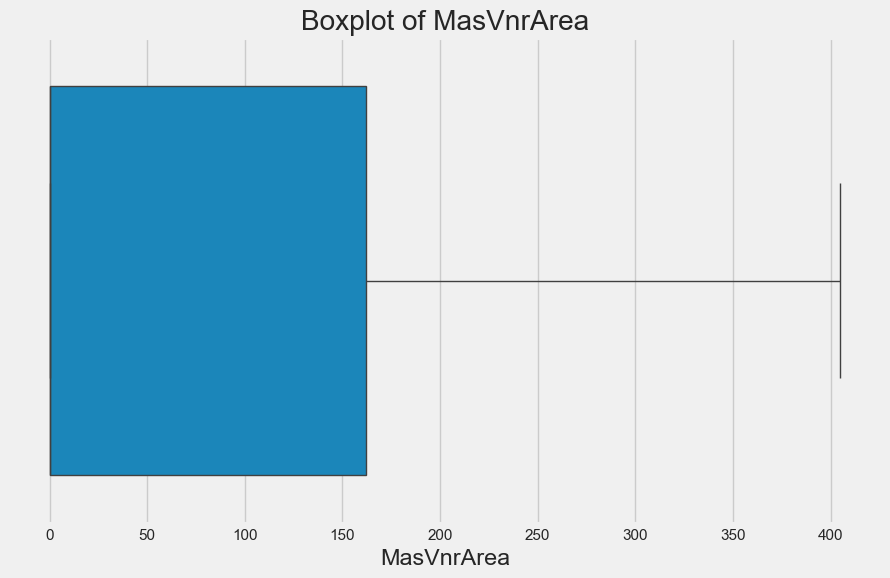

BsmtFinSF1


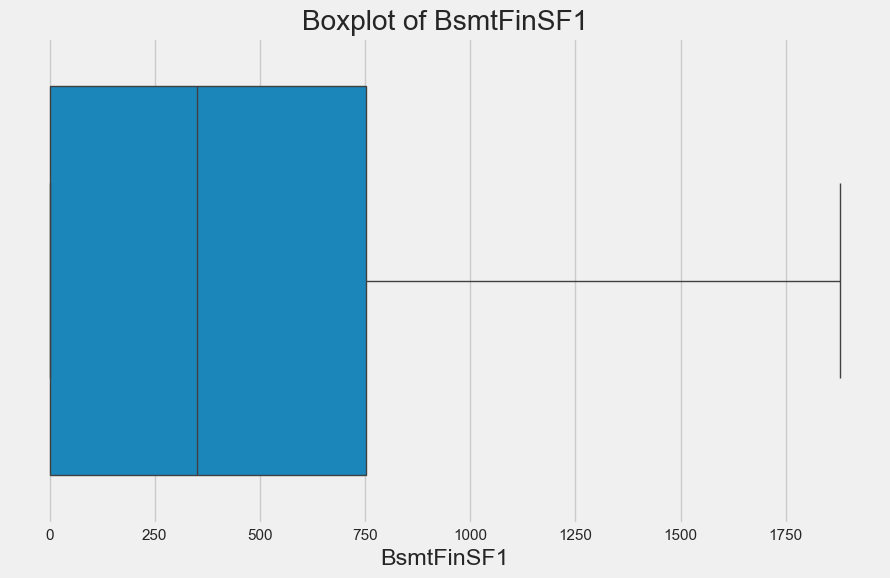

BsmtUnfSF


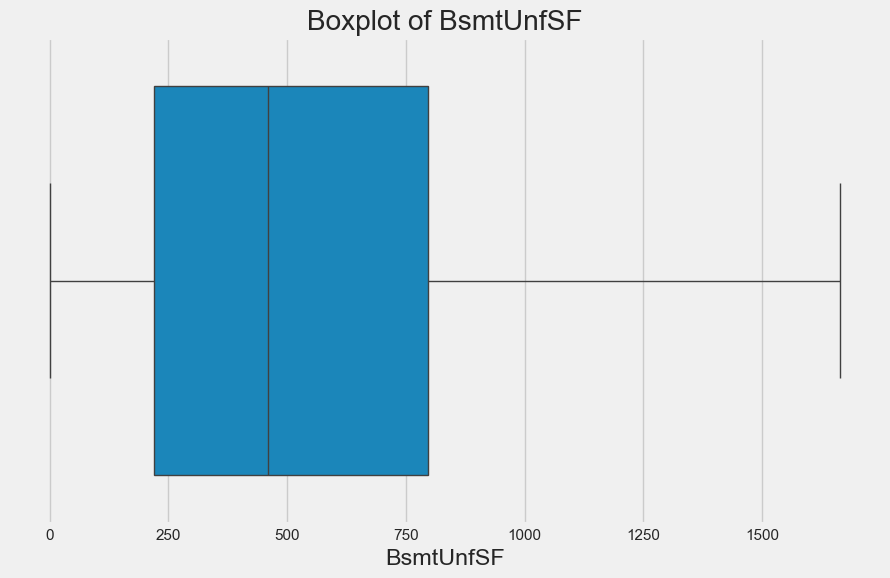

TotalBsmtSF


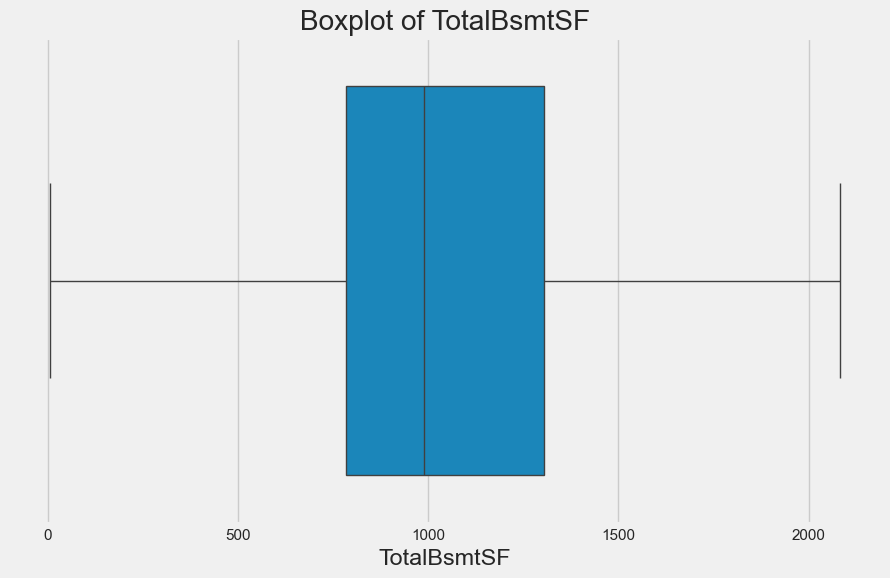

1stFlrSF


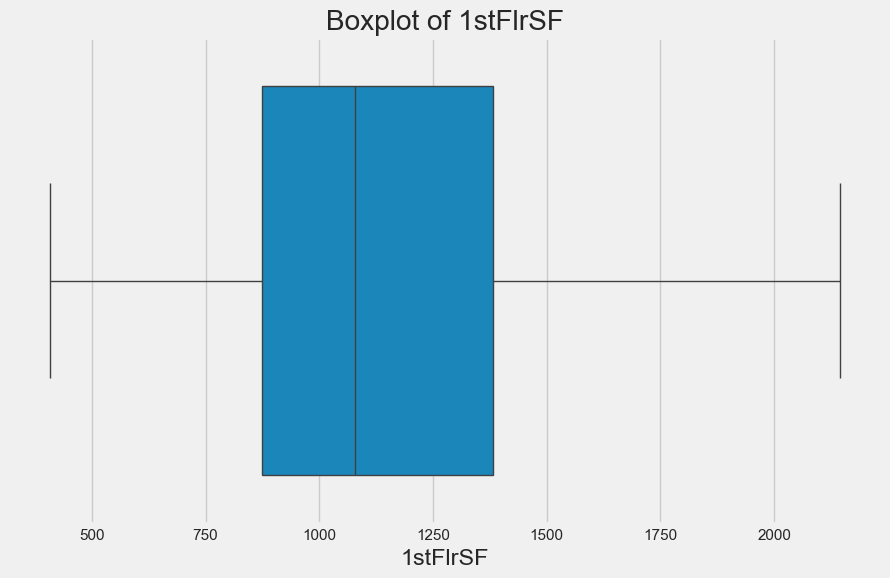

2ndFlrSF


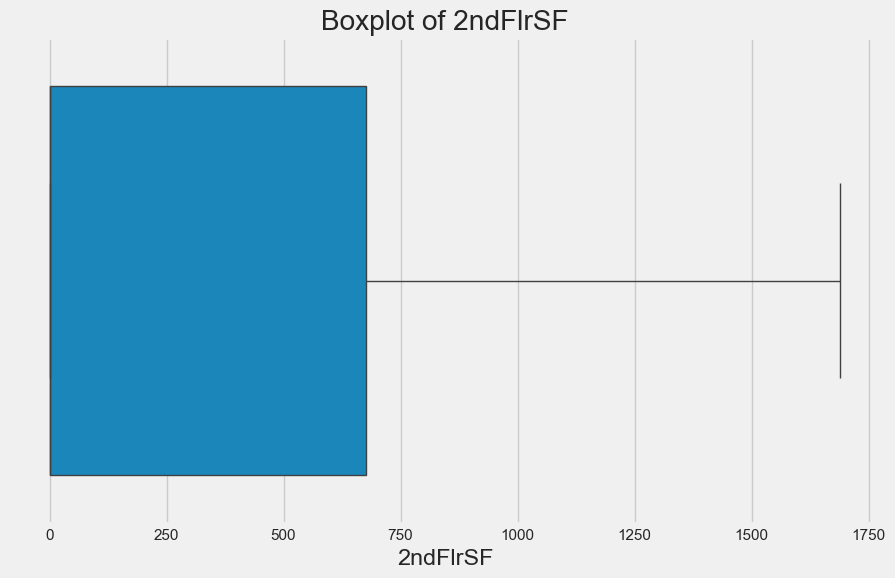

GrLivArea


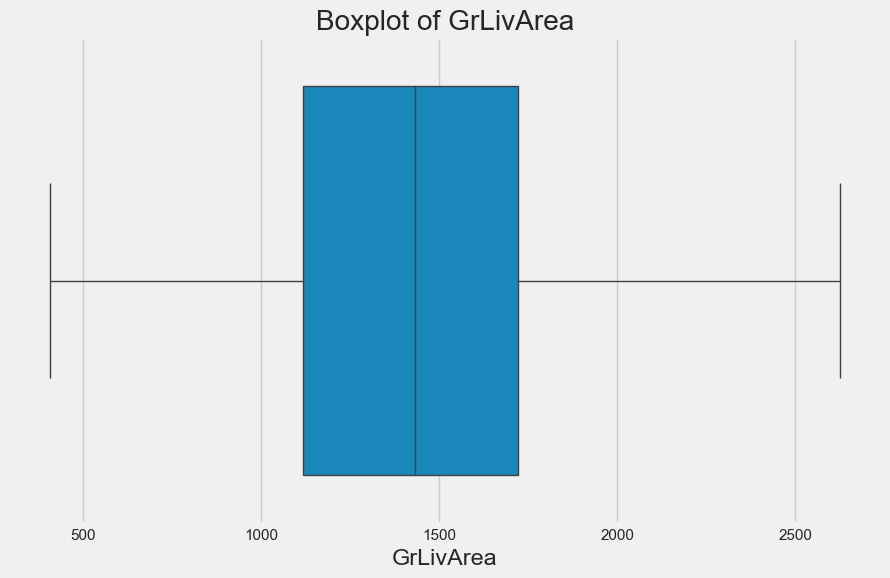

BsmtFullBath


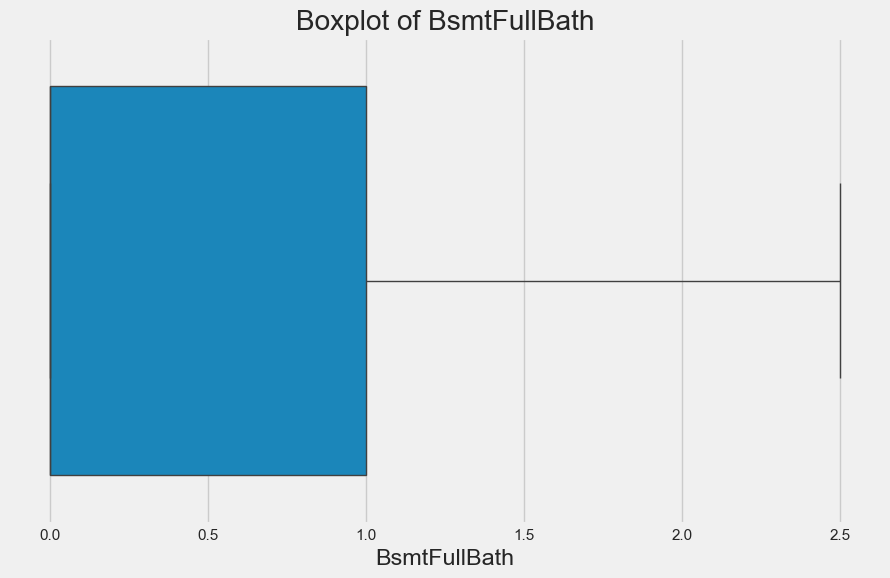

HalfBath


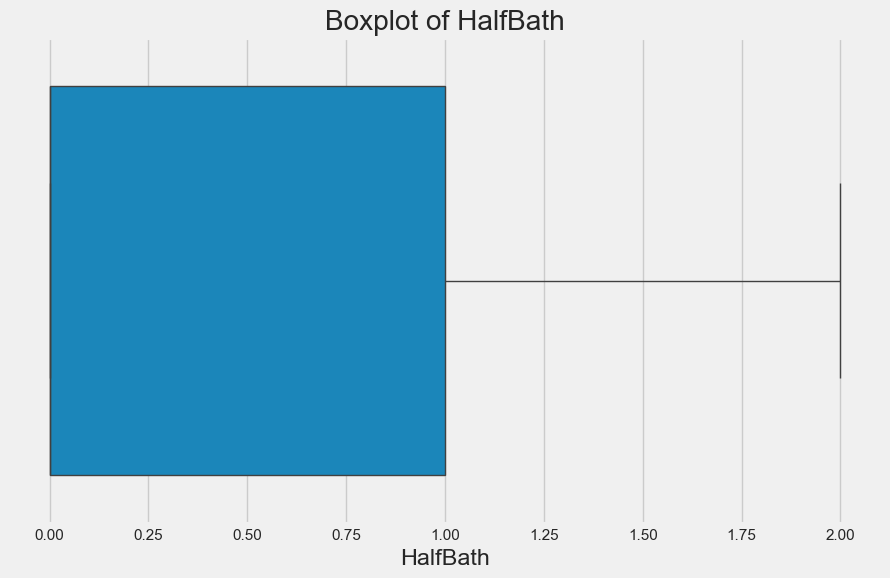

BedroomAbvGr


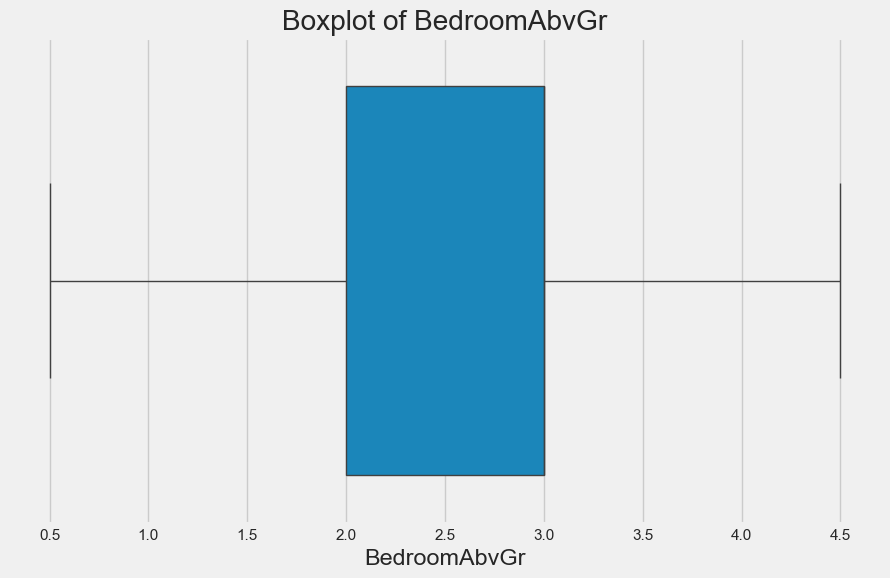

TotRmsAbvGrd


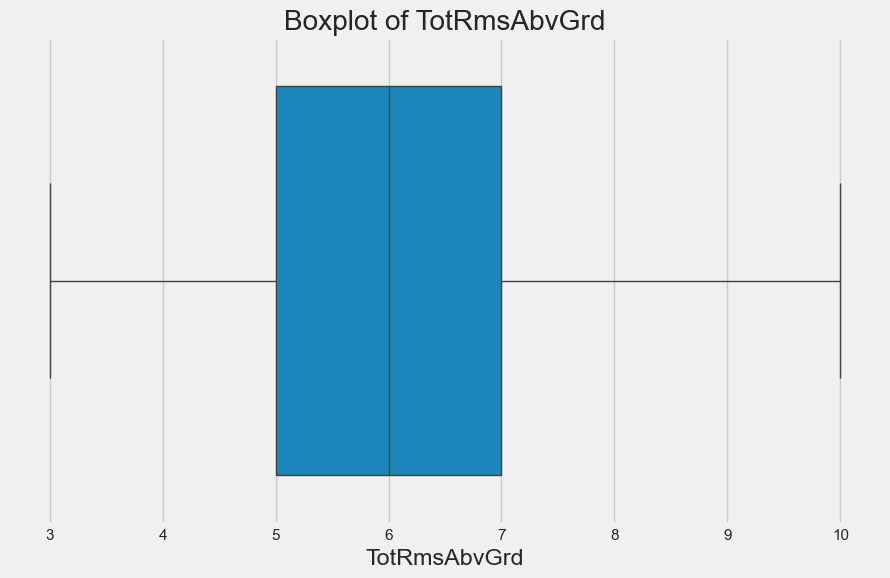

Fireplaces


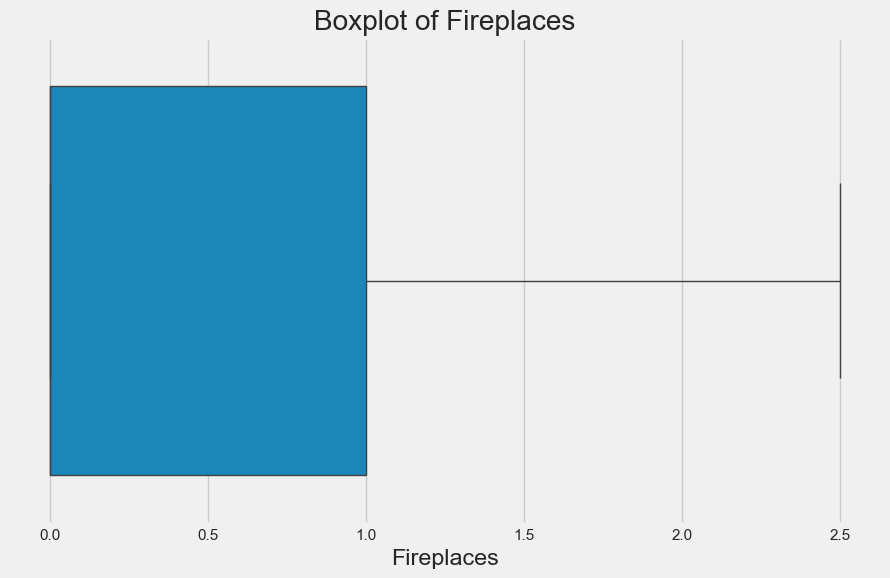

GarageYrBlt


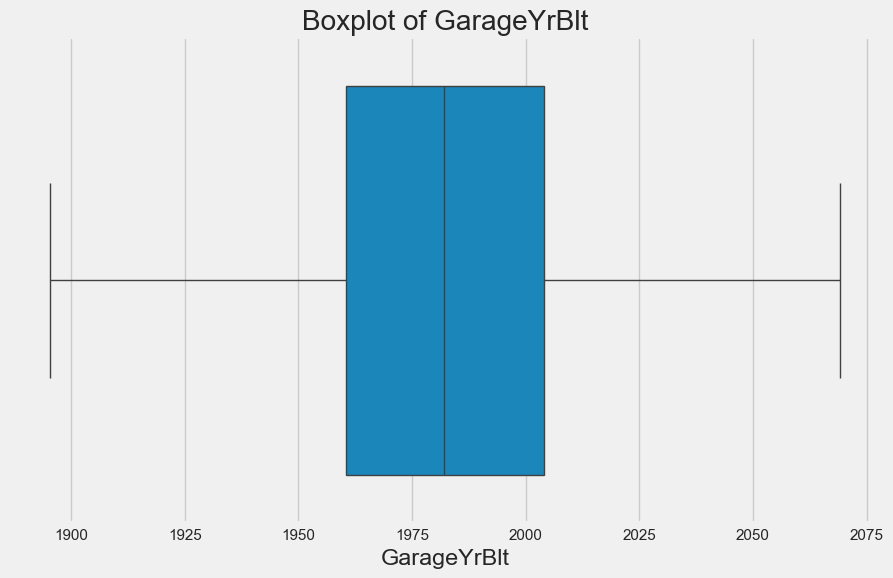

GarageCars


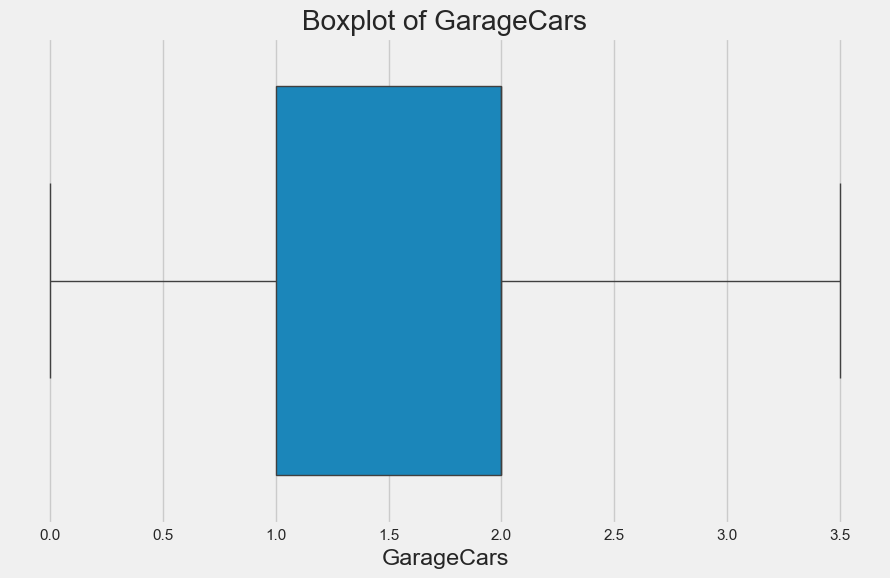

GarageArea


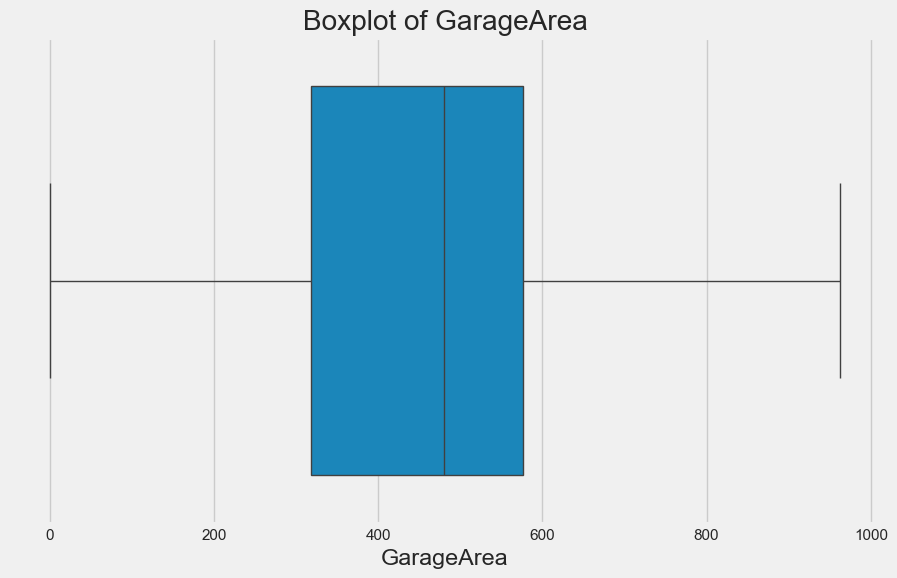

WoodDeckSF


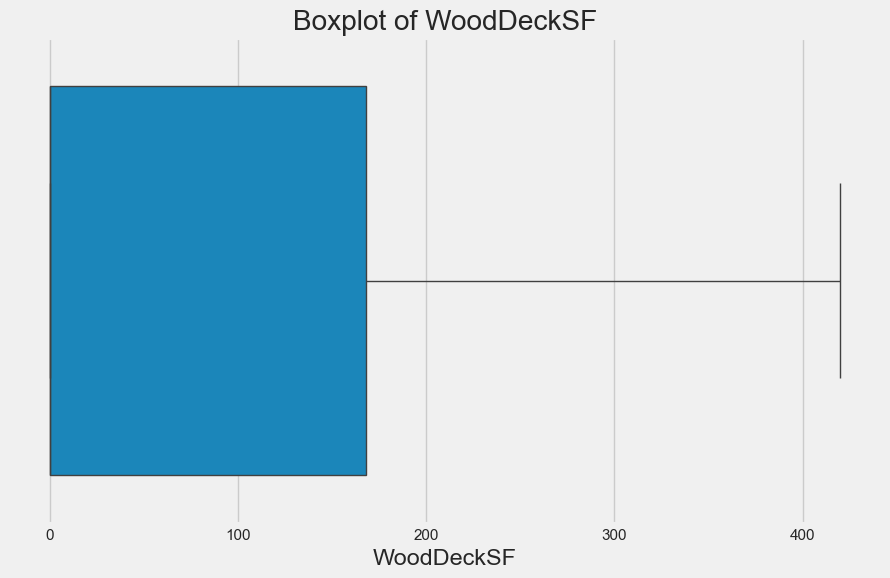

OpenPorchSF


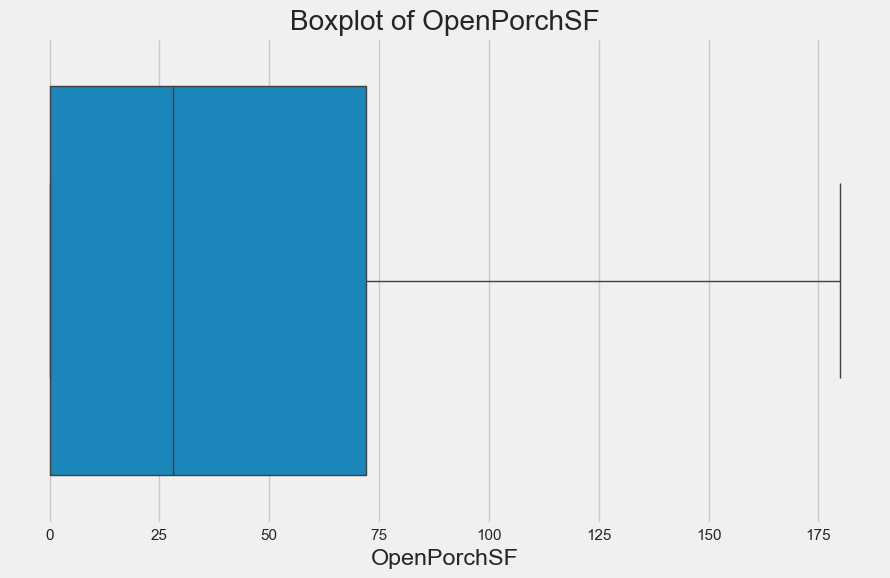

SalePrice


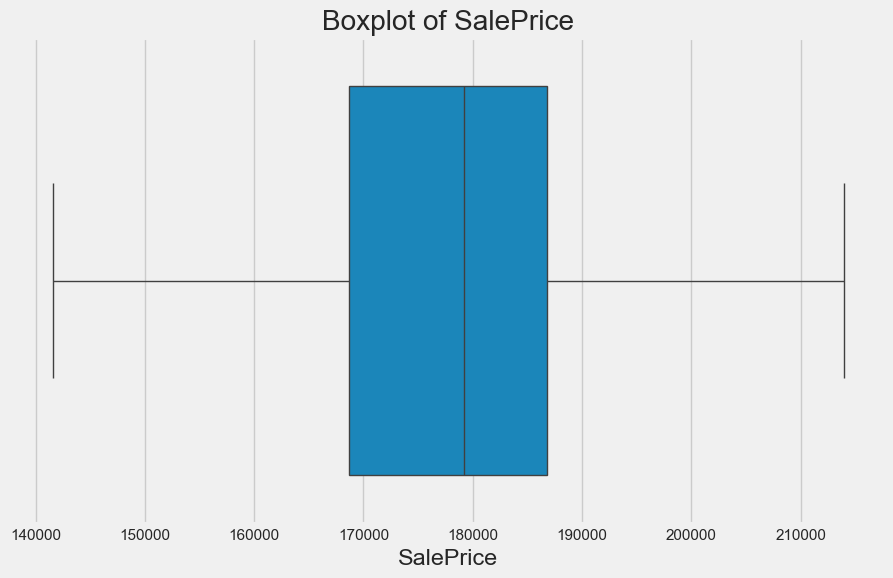

In [50]:
# Define the columns to be treated
columns_to_winsorize = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                        'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                        '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 
                        'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                        'SalePrice']

df_transformed = merged_df.copy()

# Apply winsorization to each column
for col in columns_to_winsorize:
    winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[col])
    df_transformed[col] = winsorizer.fit_transform(df_transformed[[col]])

# Generate boxplots for each column
for col in columns_to_winsorize:
    print(col)
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df_transformed[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [51]:
merged_df['PoolArea'].unique()

array([  0, 144, 368, 444, 228, 561, 800])

In [52]:
#Handle missing values
#train_data.fillna(method='ffill',inplace=True)
#Feature Scaling
#scaler = StandardScaler()
#scaled_data=scaler.fit_transform(train_data[['feature1','feature2']])

MSZoning


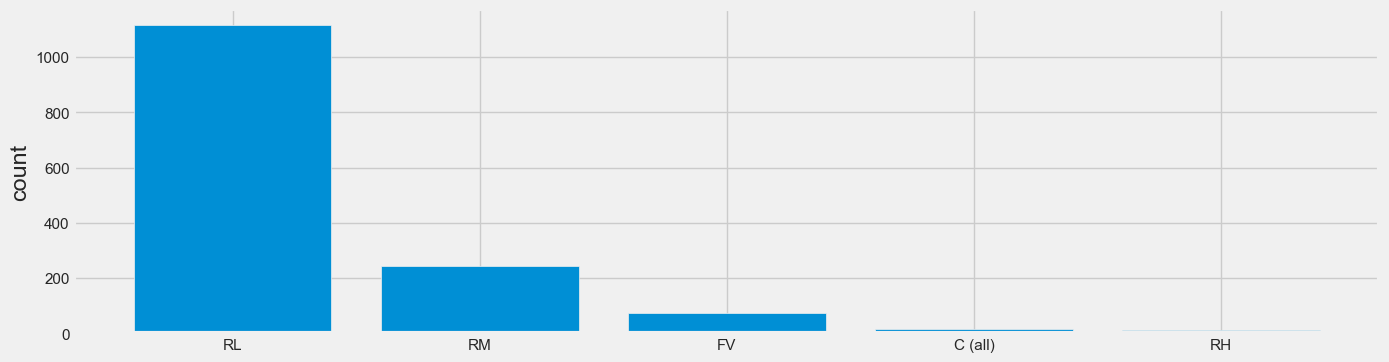

Street


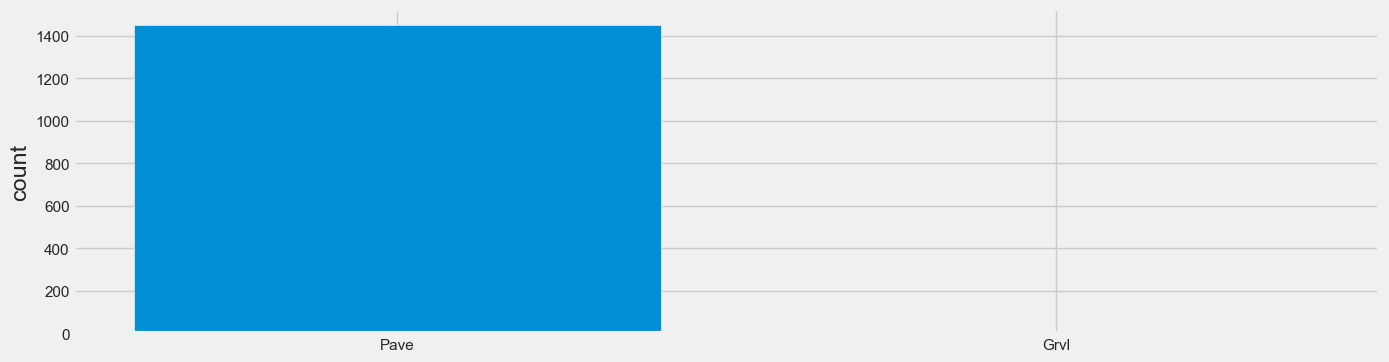

LotShape


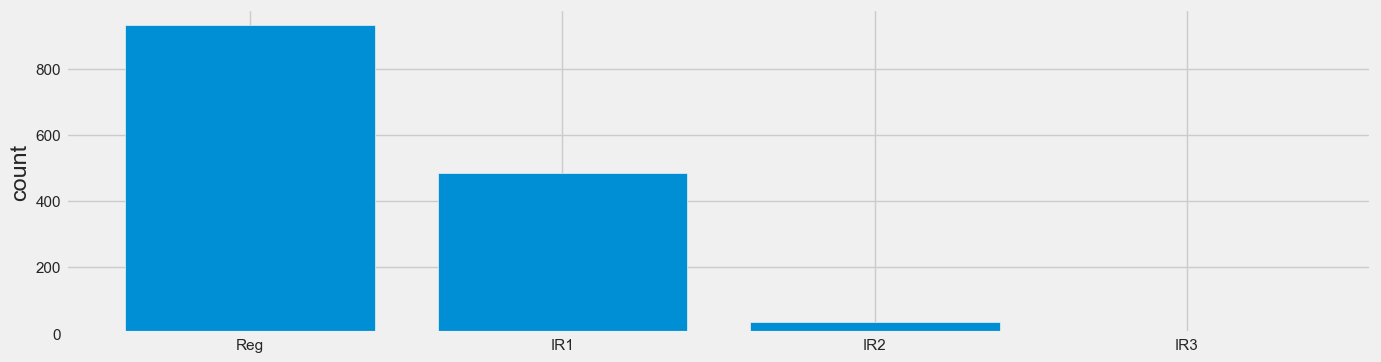

LandContour


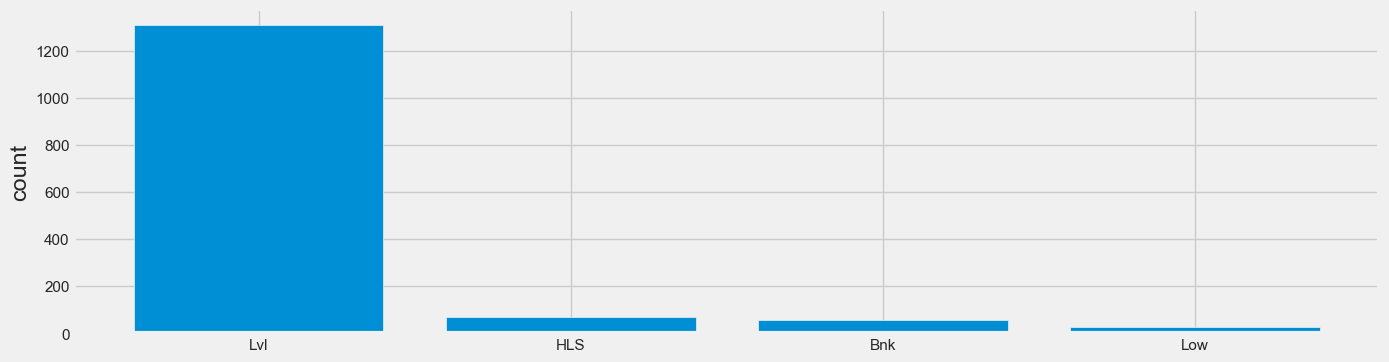

Utilities


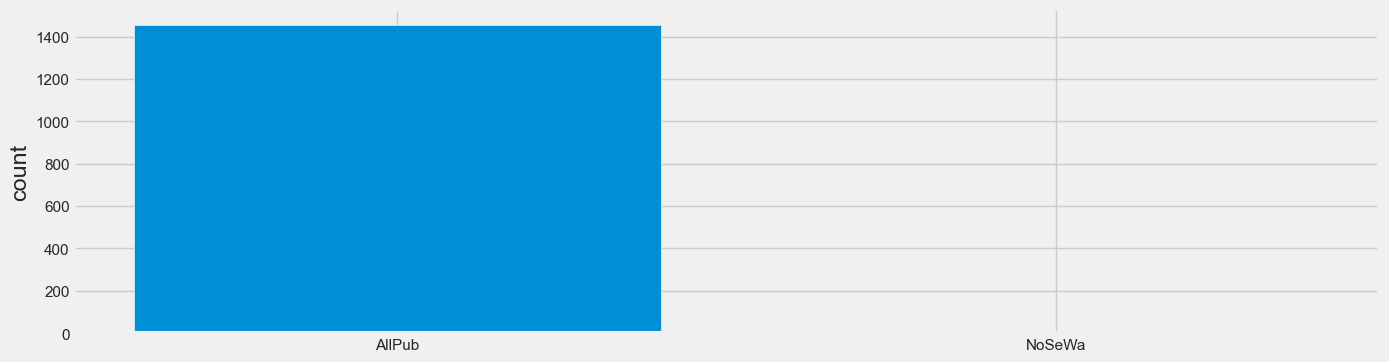

LotConfig


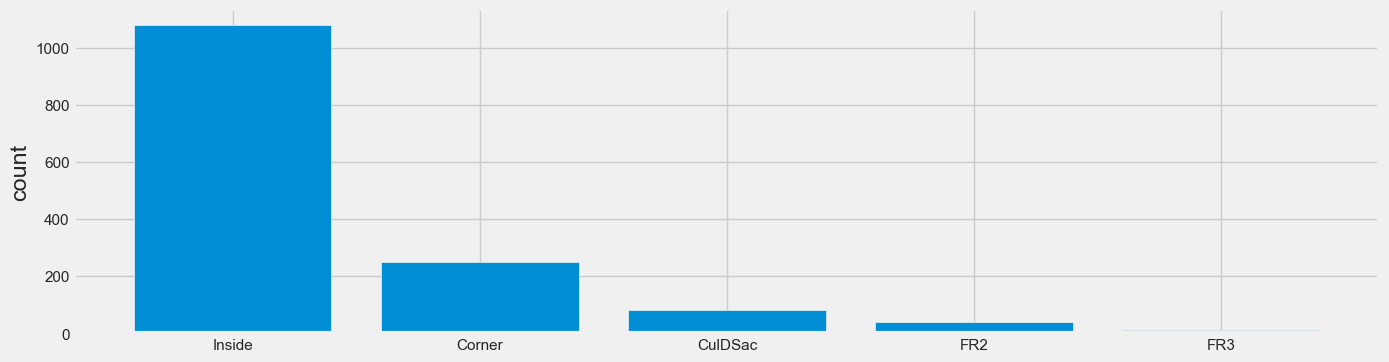

LandSlope


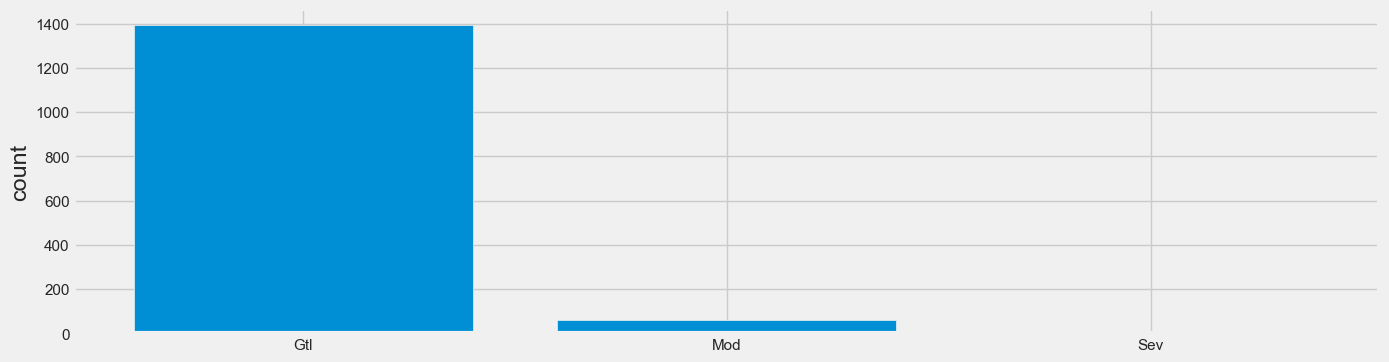

Neighborhood


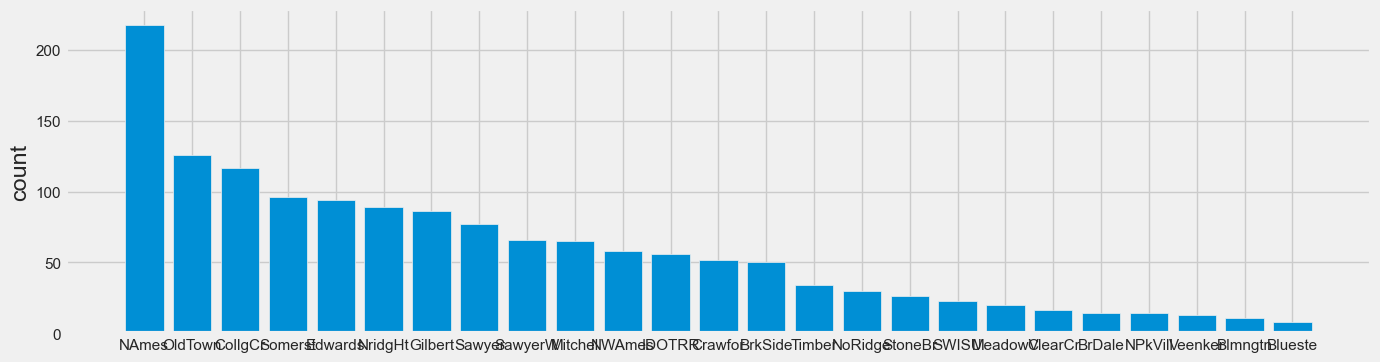

Condition1


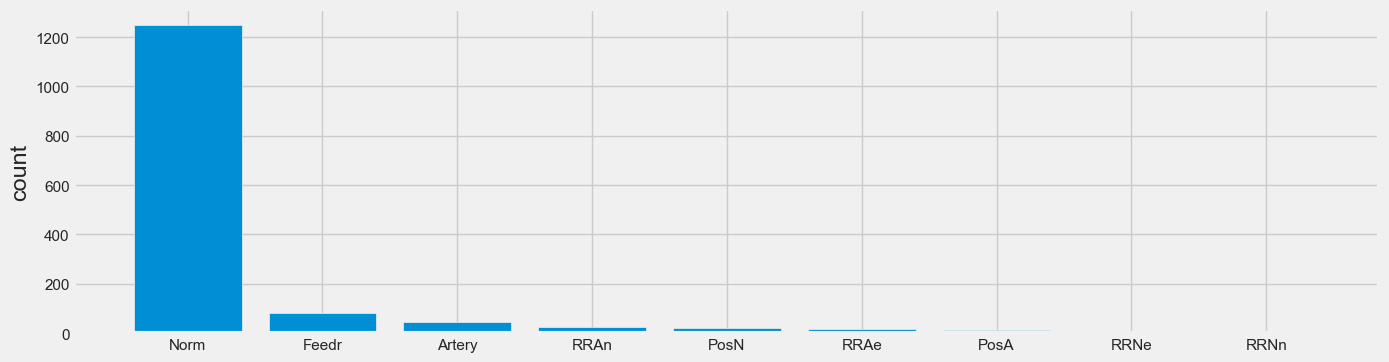

Condition2


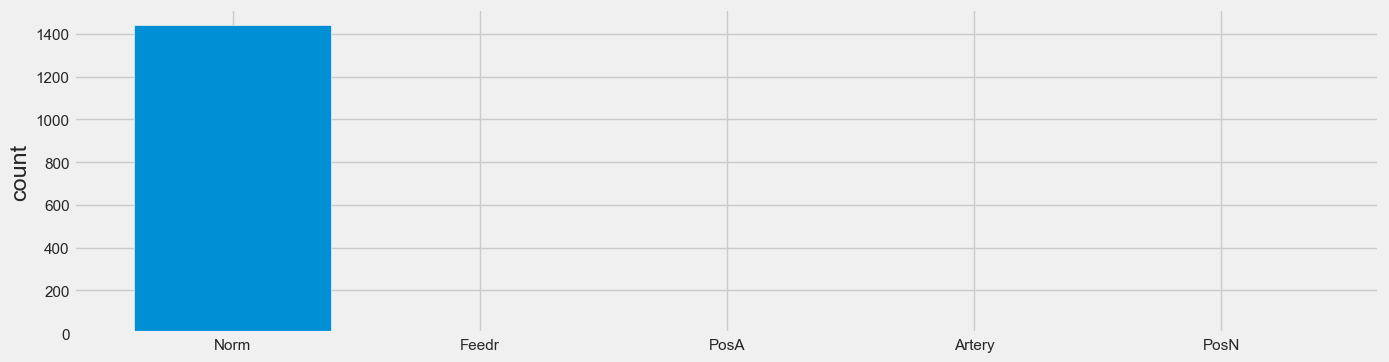

BldgType


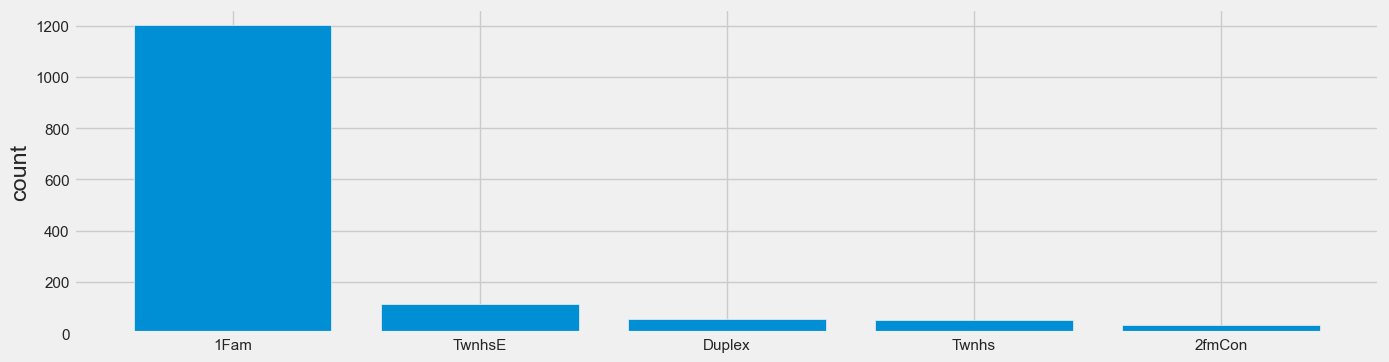

HouseStyle


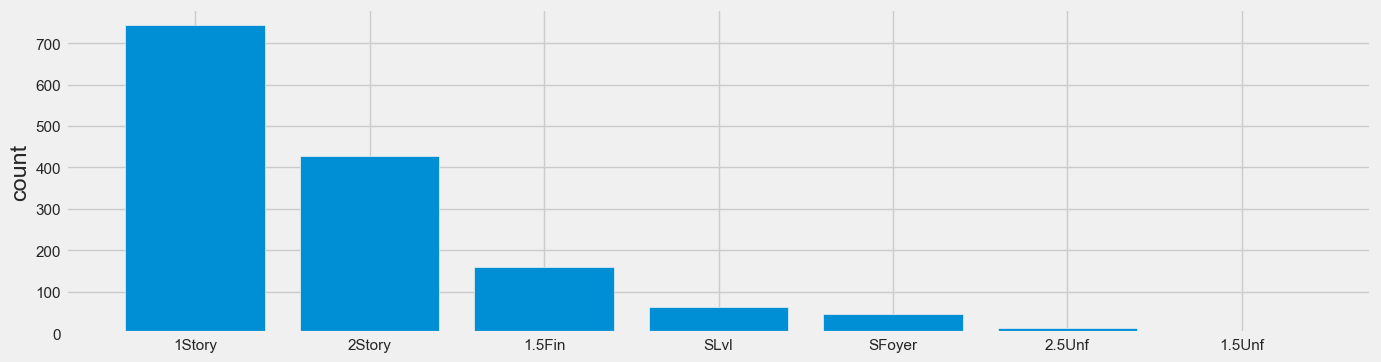

RoofStyle


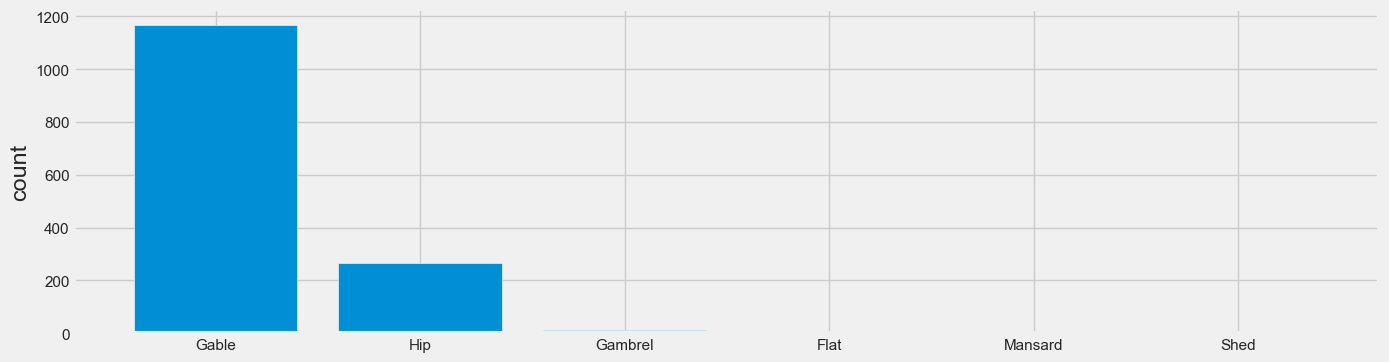

RoofMatl


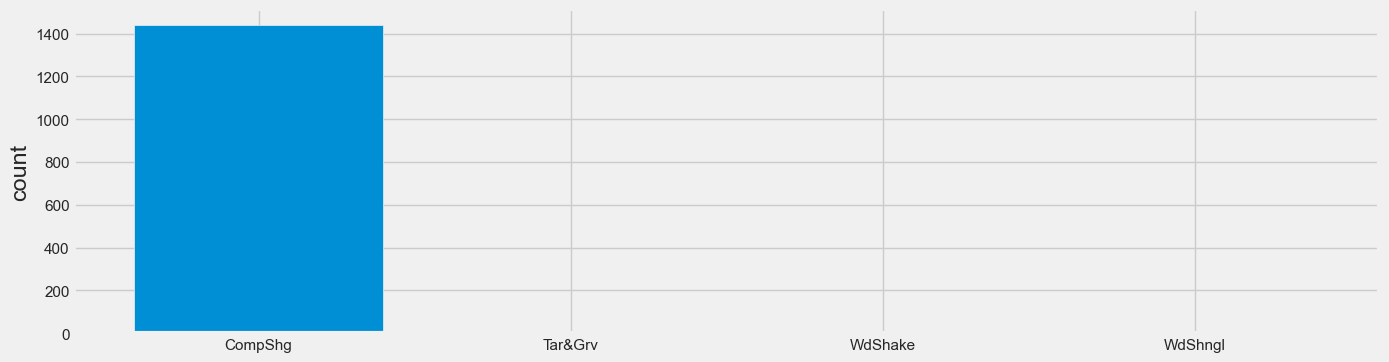

Exterior1st


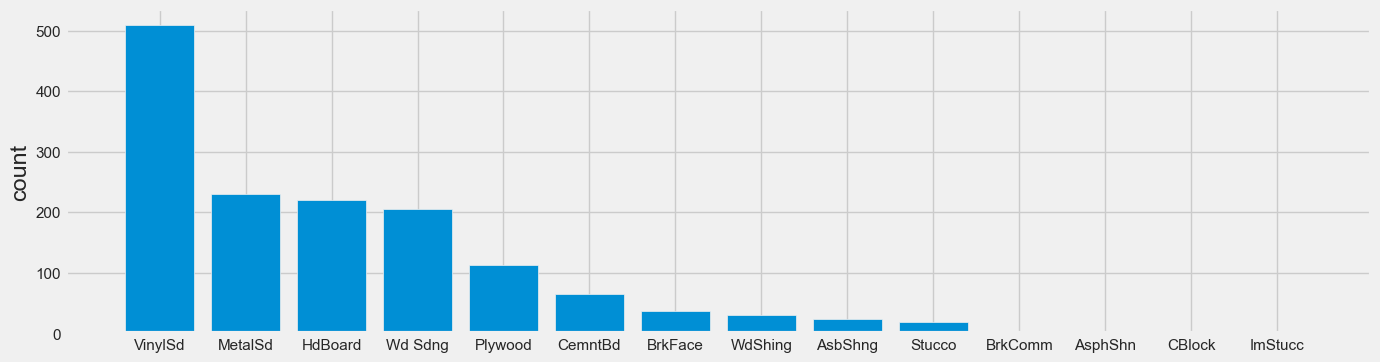

Exterior2nd


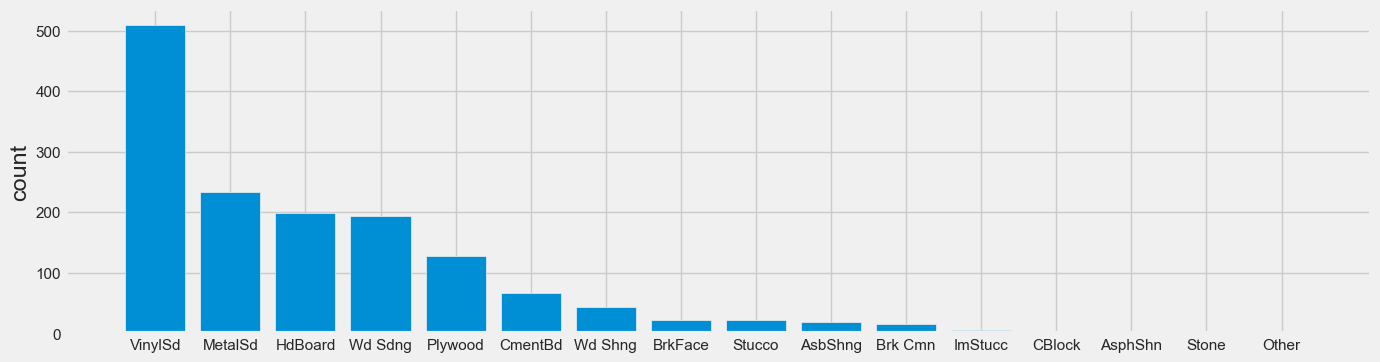

ExterQual


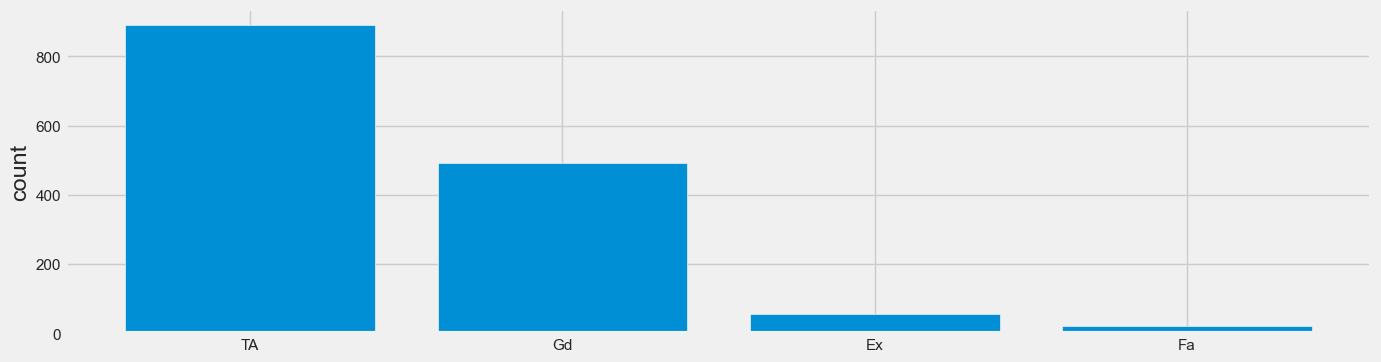

ExterCond


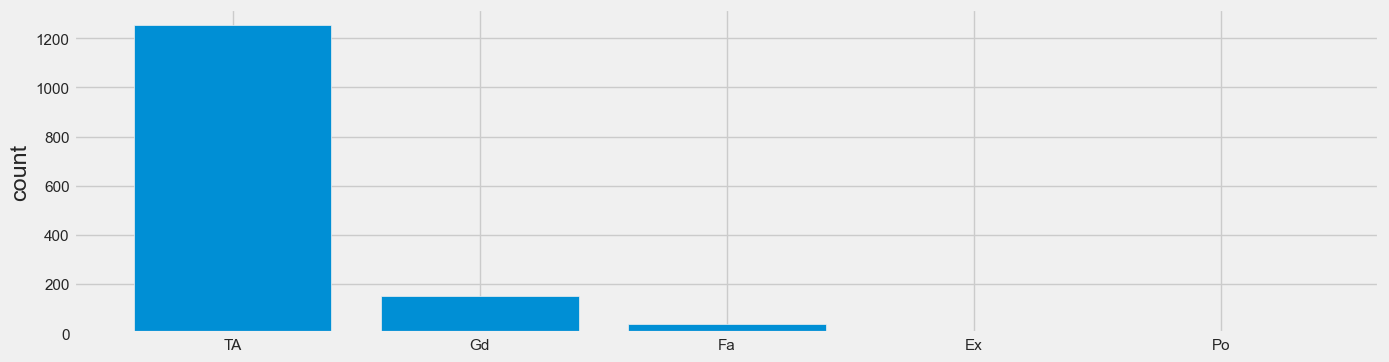

Foundation


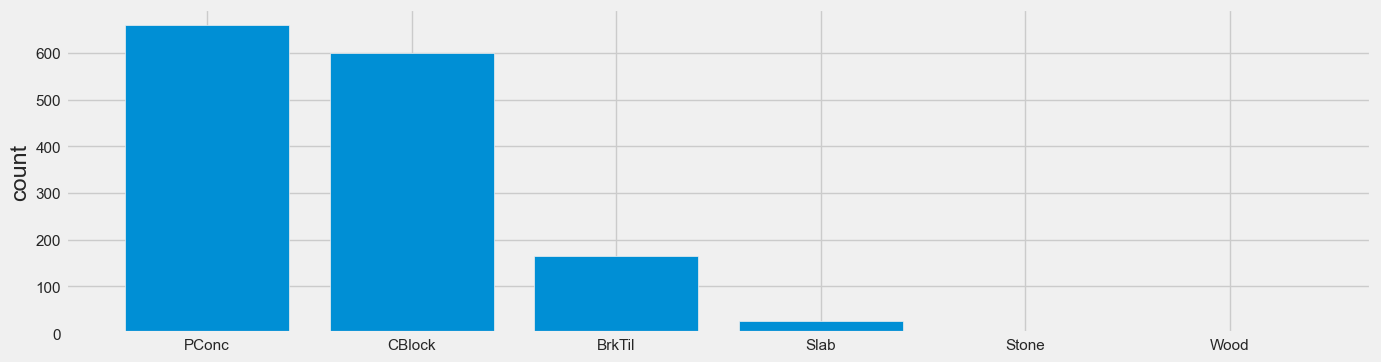

BsmtQual


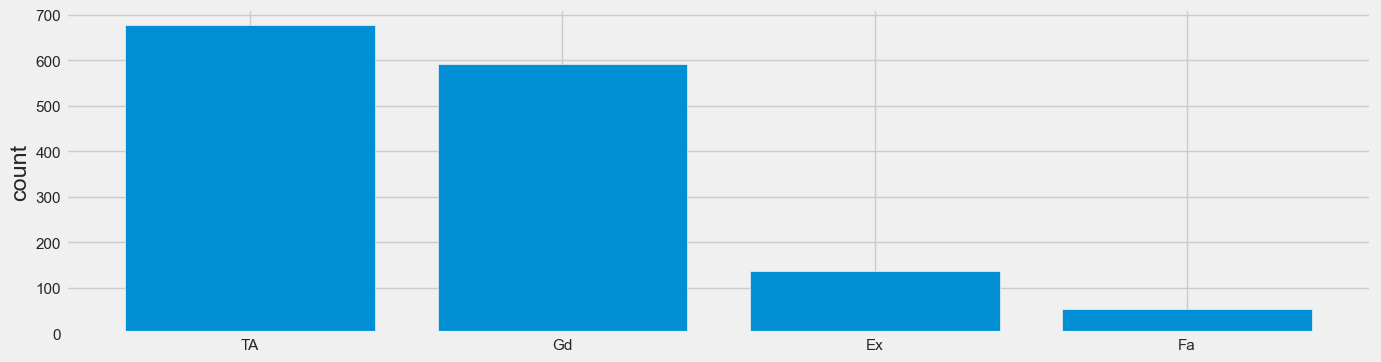

BsmtCond


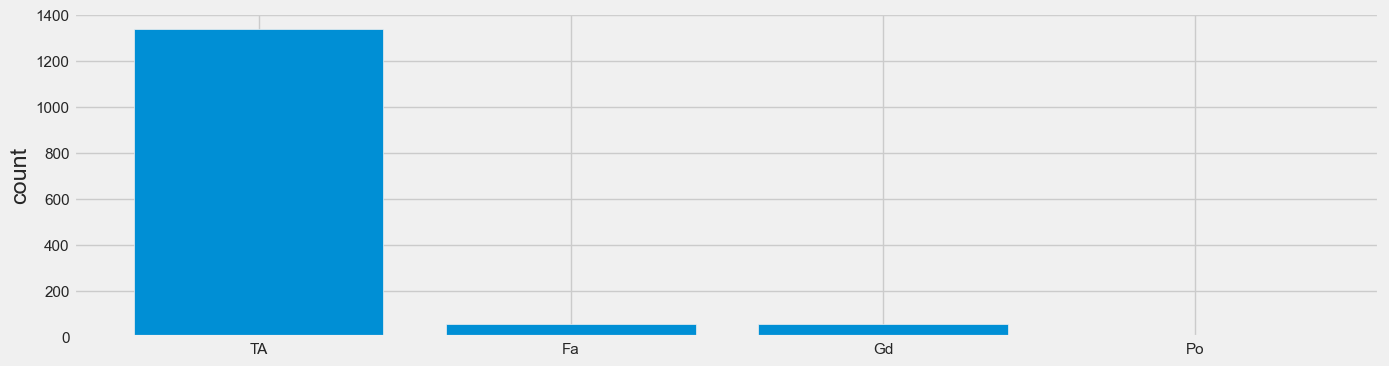

BsmtExposure


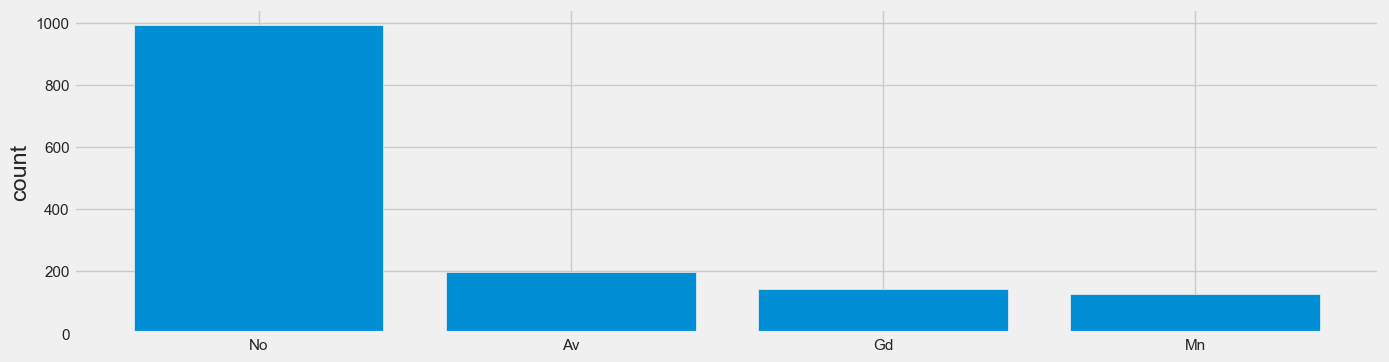

BsmtFinType1


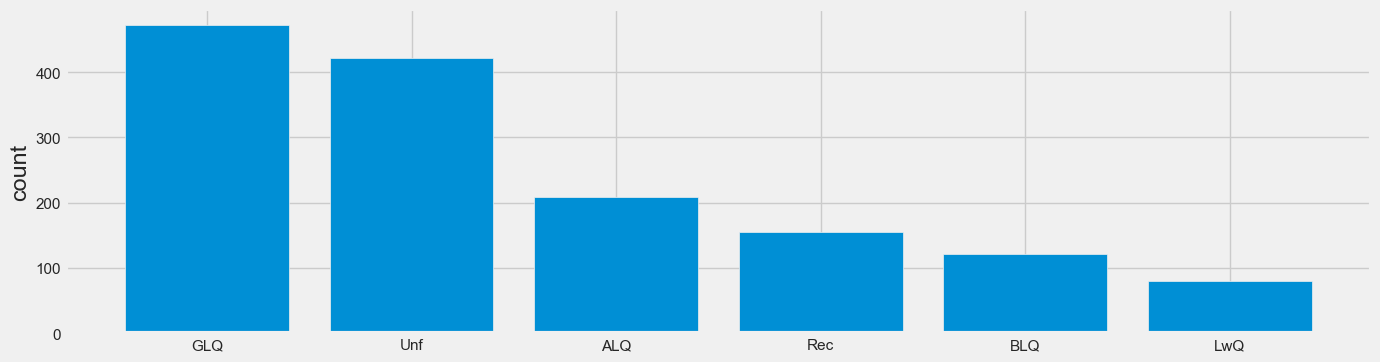

BsmtFinType2


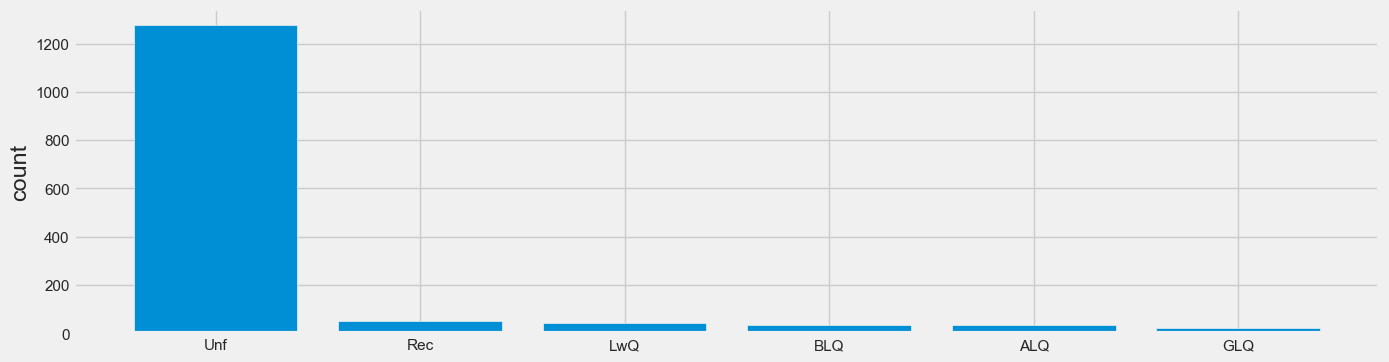

Heating


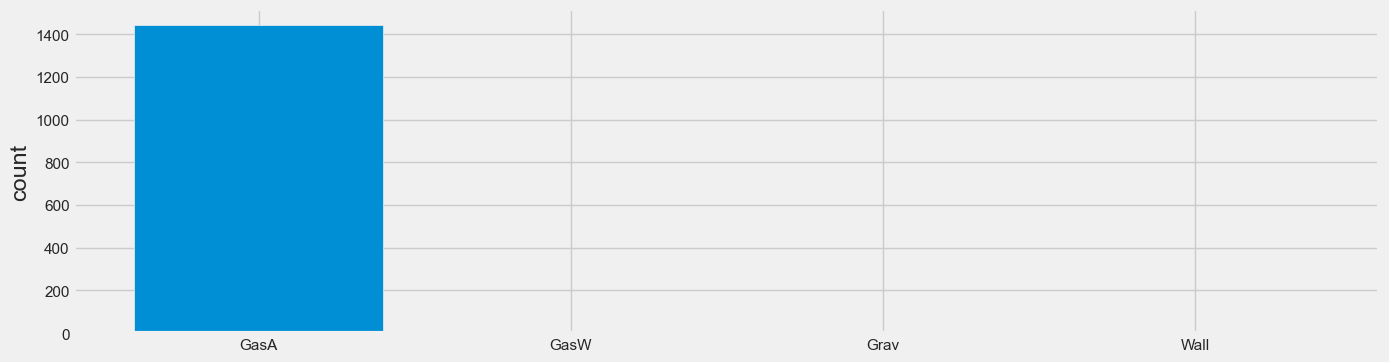

HeatingQC


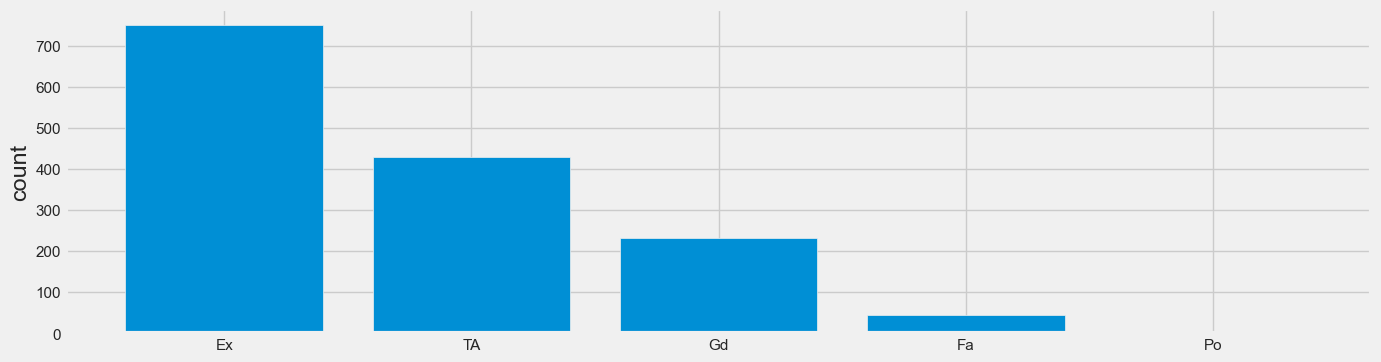

CentralAir


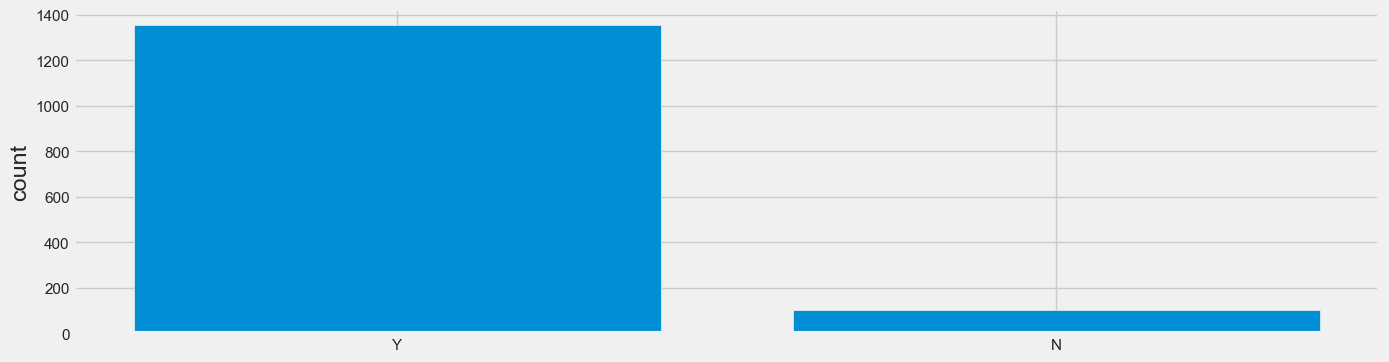

Electrical


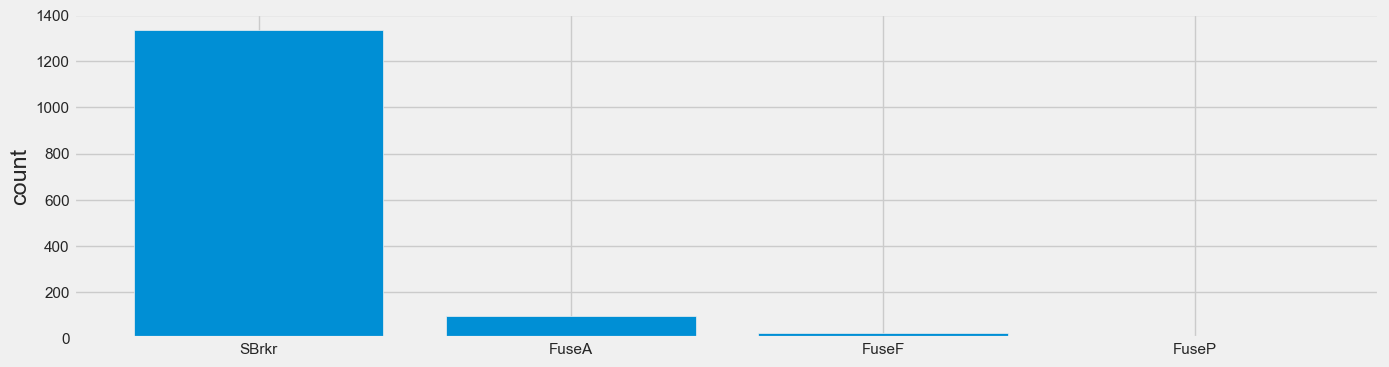

KitchenQual


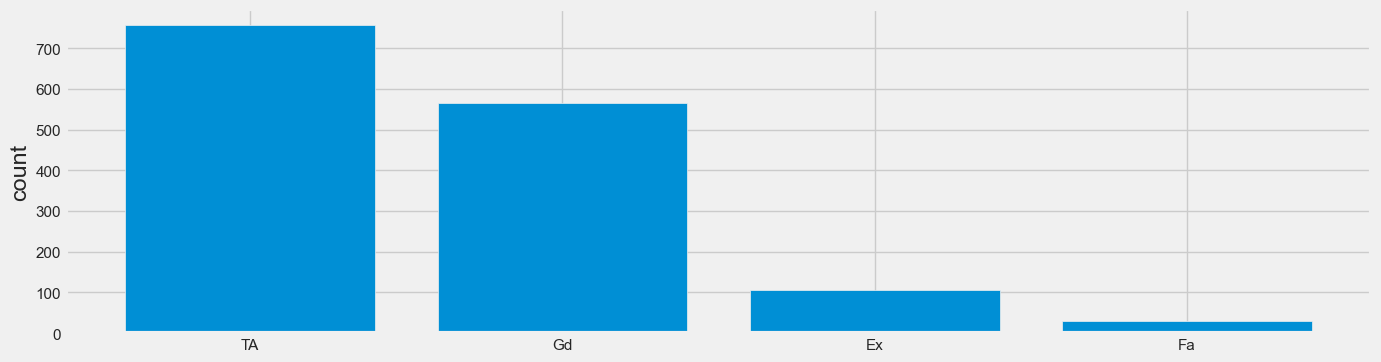

Functional


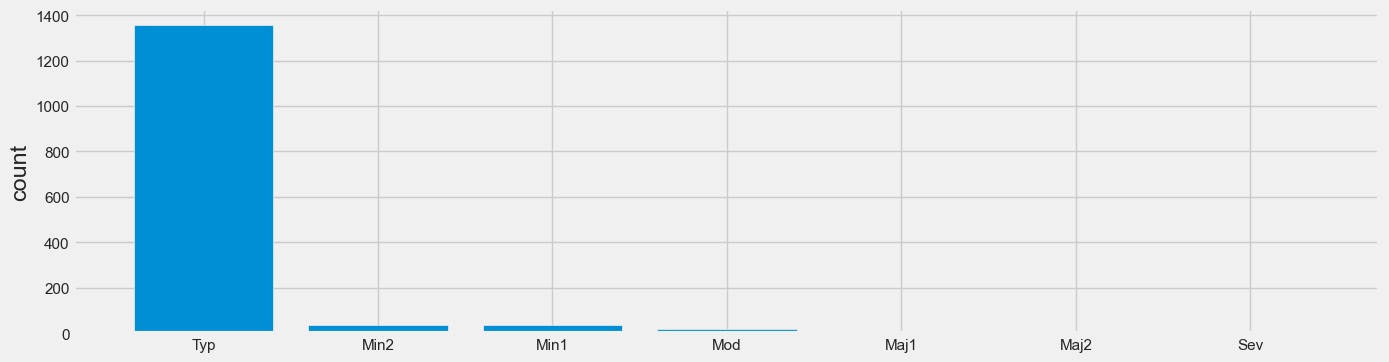

GarageType


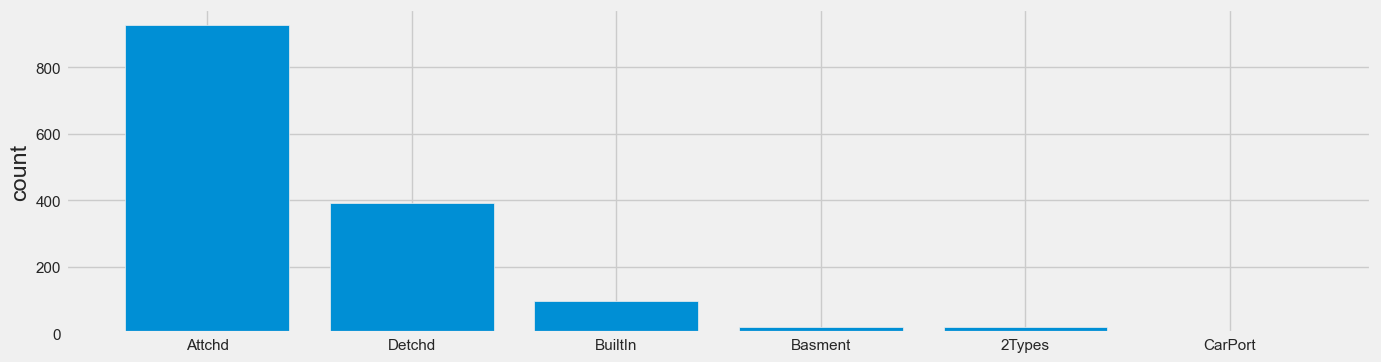

GarageFinish


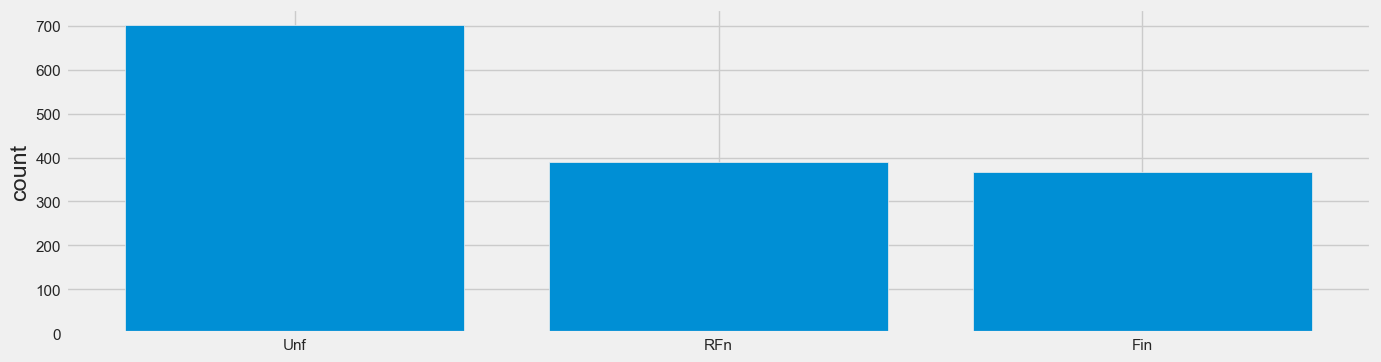

GarageQual


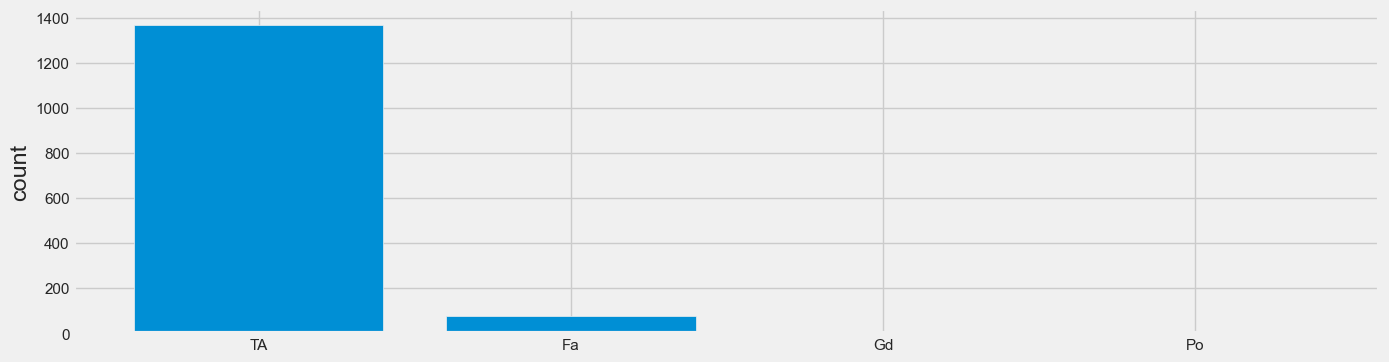

GarageCond


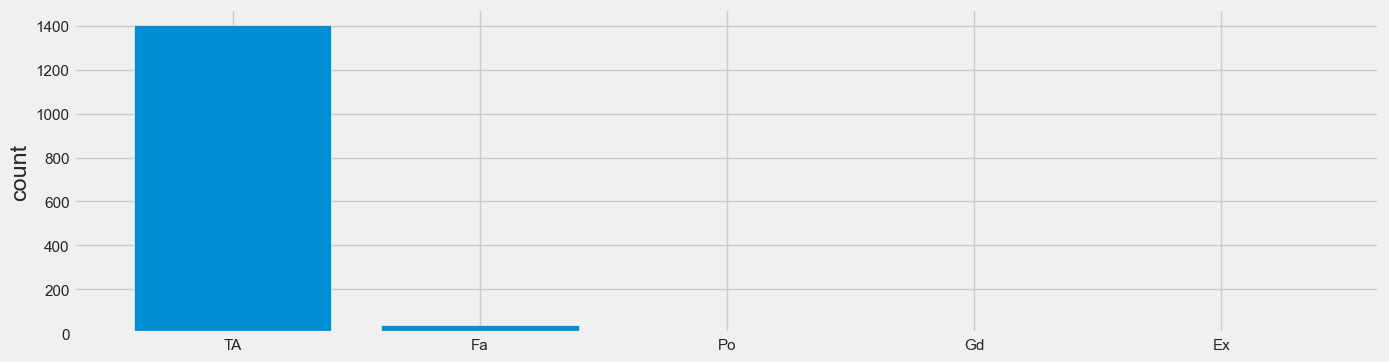

PavedDrive


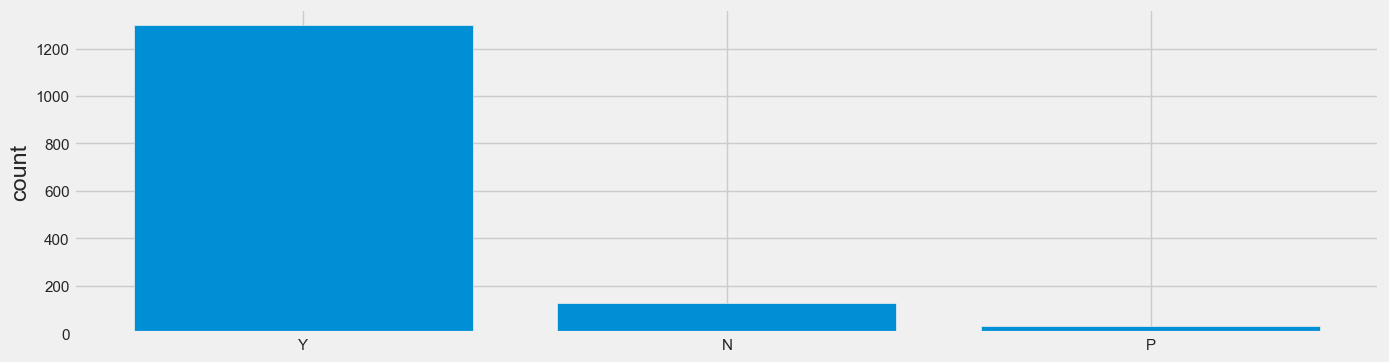

SaleType


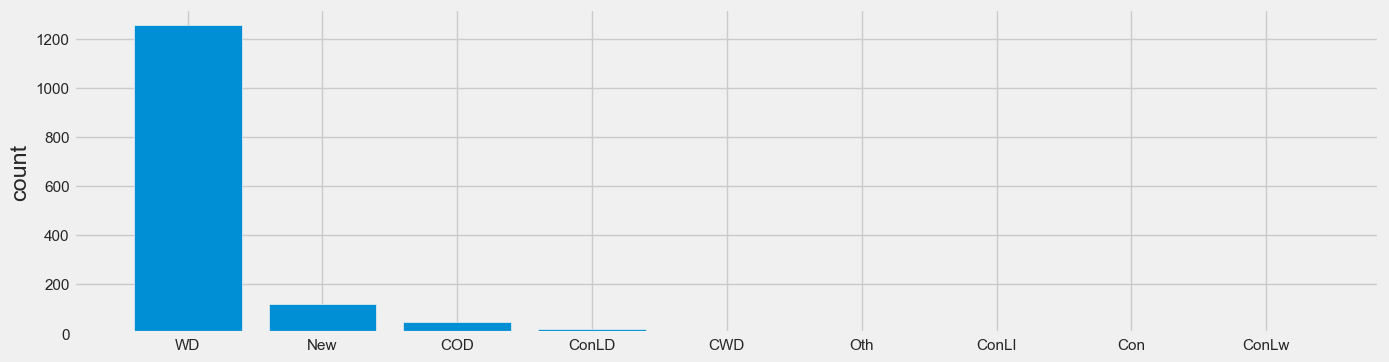

SaleCondition


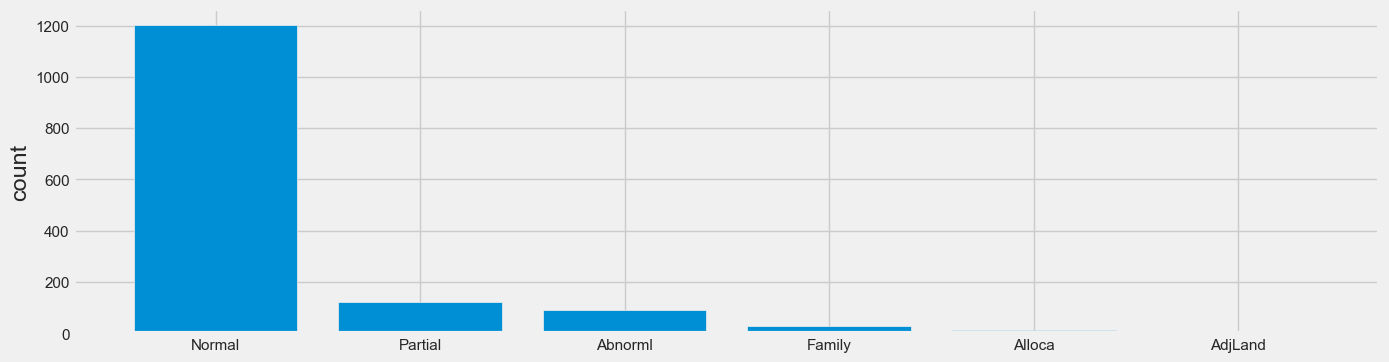

In [53]:
cat_cols3 = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']


for col in cat_cols3:
    print(col)
    #print('Skew :', round(df4[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    #plt.subplot(1, 2, 1)
    # Calculate the value counts
    counts = df_transformed[col].value_counts()

    # Plot the bar chart
    plt.bar(counts.index, counts.values)
    plt.ylabel('count')
   # plt.subplot(1, 2, 2)
    #sns.boxplot(x=df4[col])
    plt.show()

<Axes: xlabel='GarageFinish', ylabel='SalePrice'>

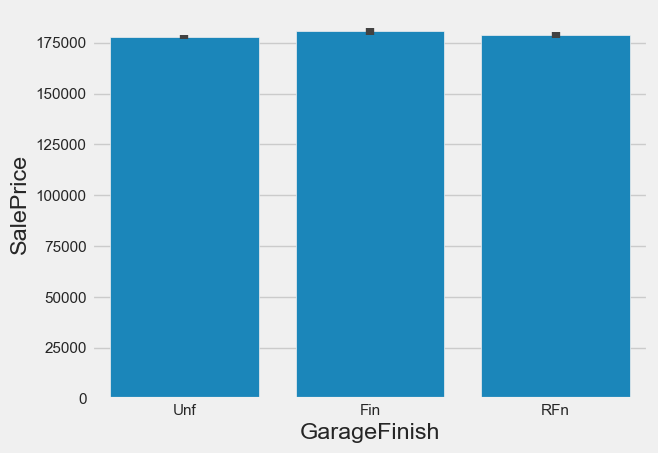

In [54]:
#plotting bar plot between number of bedrooms and premium charged.
sns.barplot(x='GarageFinish', y='SalePrice', data=df_transformed)

<Axes: xlabel='Street', ylabel='SalePrice'>

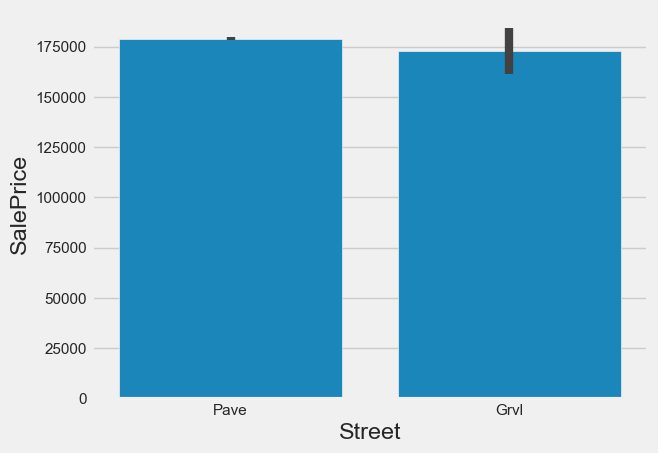

In [55]:
sns.barplot(x='Street', y='SalePrice', data=df_transformed)

<Axes: xlabel='Street', ylabel='SalePrice'>

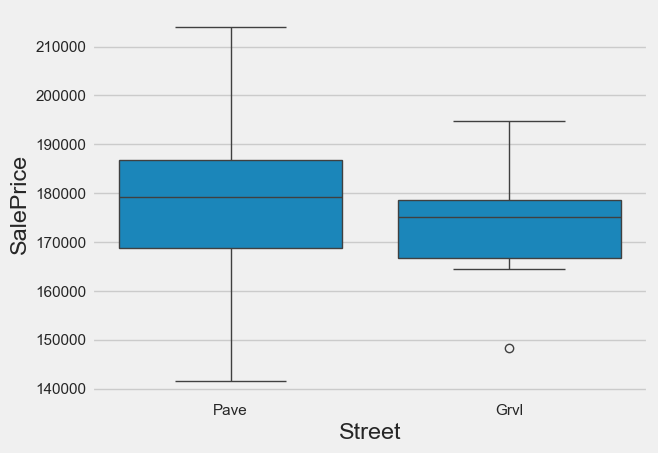

In [56]:
sns.boxplot(x='Street', y='SalePrice', data=df_transformed)

<Axes: xlabel='RoofStyle', ylabel='SalePrice'>

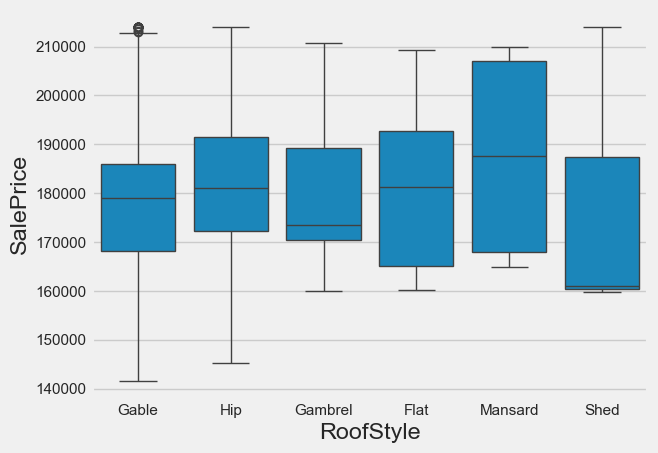

In [57]:
sns.boxplot(x='RoofStyle', y='SalePrice', data=df_transformed)

<Axes: xlabel='Electrical', ylabel='SalePrice'>

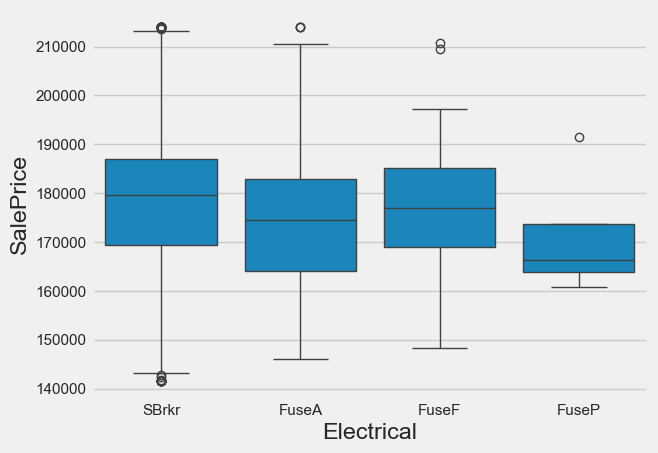

In [58]:
sns.boxplot(x='Electrical', y='SalePrice', data=df_transformed)

### Data Encoding

In [59]:
df_transformed.shape

(1459, 74)

In [60]:
#[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']]

In [61]:
#Checking the total number of categorical and numerical columns
cat_cols4=df_transformed.select_dtypes(include=['object']).columns
num_cols4 = df_transformed.select_dtypes(include=np.number).columns.tolist()
#categorical
print("Categorical Variables:")
print(cat_cols4)
print("sum of cat_variables:",len(cat_cols4))
#numerical
print("Numerical Variables:")
print(num_cols4)
print("sum of numerical_variables:",len(num_cols4))

Categorical Variables:
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
sum of cat_variables: 34
Numerical Variables:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF

In [62]:
df_transformed['LandSlope'].dtype

dtype('O')

In [63]:
df_transformed.shape


(1459, 74)

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to one-hot encode
categorical_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for col in categorical_columns:
    df_transformed[col] = label_encoder.fit_transform(df_transformed[col])
    

In [65]:
df_transformed.shape

(1459, 74)

In [66]:
# df_encoded2 = df_transformed.copy()
# df_encoded2 = pd.get_dummies(df_encoded2,drop_first=True)

In [67]:
# df_encoded2.head()

In [68]:
# finding the correlation of your DataFrame
correlation_matrix = df_transformed.corr()

# Filter the correlation matrix based on the threshold
threshold = 0.7
highly_correlated = correlation_matrix.abs() >= threshold
correlation_matrix_filtered = correlation_matrix.mask(~highly_correlated)

# Flatten the filtered correlation matrix into a DataFrame
filtered_values = correlation_matrix_filtered.unstack().dropna()
filtered_values = filtered_values[filtered_values != 1]  # Exclude diagonal values

# Create a DataFrame to display the filtered correlation values
table_df = pd.DataFrame(filtered_values, columns=['Correlation'])

# Display the table
table_df

,,Correlation
MSSubClass,BldgType,0.766316
BldgType,MSSubClass,0.766316
YearBuilt,GarageYrBlt,0.743019
Exterior1st,Exterior2nd,0.840480
Exterior2nd,Exterior1st,0.840480
BsmtFinType2,BsmtFinSF2,-0.745676
BsmtFinSF2,BsmtFinType2,-0.745676
TotalBsmtSF,1stFlrSF,0.786404
1stFlrSF,TotalBsmtSF,0.786404
GrLivArea,TotRmsAbvGrd,0.792992


# Clean testing data

## TESTING DATA

In [73]:
testing_data = df_transformed.copy()

In [74]:
testing_data = testing_data.to_csv("TEST.csv",index=True)

In [75]:
dff2 = pd.read_csv("TEST.csv")

In [76]:
dff2.shape

(1459, 75)